In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [2]:
df = pd.read_csv('Data/Part_1_Crime_Data.csv',low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599552 entries, 0 to 599551
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                598565 non-null  float64
 1   Y                598565 non-null  float64
 2   RowID            599552 non-null  int64  
 3   CCNumber         599552 non-null  object 
 4   CrimeDateTime    599552 non-null  object 
 5   CrimeCode        599552 non-null  object 
 6   Description      599552 non-null  object 
 7   Inside_Outside   544098 non-null  object 
 8   Weapon           145841 non-null  object 
 9   Post             591684 non-null  float64
 10  Gender           503826 non-null  object 
 11  Age              482834 non-null  float64
 12  Race             574744 non-null  object 
 13  Ethnicity        72680 non-null   object 
 14  Location         596145 non-null  object 
 15  Old_District     567359 non-null  object 
 16  New_District     24325 non-null   obje

X          Y  RowID  CCNumber           CrimeDateTime CrimeCode  \
0 -76.657267  39.309538      1  12K00752  2012/09/29 00:15:00+00        3B   
1 -76.660807  39.336503      2  12I14045  2012/09/29 13:30:00+00        5A   
2 -76.618110  39.315278      3  12I14257  2012/09/29 22:50:00+00        4D   
3 -76.566550  39.352932      4  12I14212  2012/09/29 16:10:00+00        5B   
4 -76.636347  39.308291      5  12I14217  2012/09/29 21:40:00+00        7C   

    Description Inside_Outside Weapon   Post Gender   Age  \
0       ROBBERY              O    NaN  731.0      F  18.0   
1      BURGLARY              I    NaN  533.0      M  61.0   
2  AGG. ASSAULT              I  HANDS  514.0      F  56.0   
3      BURGLARY              I    NaN  423.0      F  28.0   
4    AUTO THEFT              O    NaN  131.0      F  45.0   

                        Race Ethnicity             Location Old_District  \
0  BLACK_OR_AFRICAN_AMERICAN       NaN     2500 W NORTH AVE      WESTERN   
1  BLACK_OR_AFRICAN_AMERICAN       NaN      2600 OSWEGO AVE     NORTHERN   
2  BLACK_OR_AFRICAN_AMERICAN       NaN    2300 MARYLAND AVE     NORTHERN   
3                      WHITE       NaN      5300 MORELLO RD    NORTHEAST   
4  BLACK_OR_AFRICAN_AMERICAN       NaN  HILL AVE & BLOOM ST      CENTRAL   

  New_District    Neighborhood   Latitude  Longitude  \
0          NaN       MONDAWMIN  39.309538 -76.657267   
1          NaN     GREENSPRING  39.336503 -76.660807   
2          NaN     OLD GOUCHER  39.315278 -76.618110   
3          NaN  HAMILTON HILLS  39.352932 -76.566550   
4          NaN   DRUID HEIGHTS  39.308291 -76.636347   

                               GeoLocation           PremiseType  \
0                   (39.309538,-76.657267)  STREET                 
1                   (39.336503,-76.660807)  APT/CONDO - OCCUPIED   
2                    (39.315278,-76.61811)  APT/CONDO - OCCUPIED   
3                    (39.352932,-76.56655)     ROW/TOWNHOUSE-OCC   
4  (39.30829090873204,-76.636346920254752)  STREET                 

   Total_Incidents  
0                1  
1                1  
2                1  
3                1  
4                1

In [3]:
test_date = df.loc[0, 'CrimeDateTime']
test_date

'2012/09/29 00:15:00+00'

In [4]:
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2012-09-29 00:15:00+0000', tz='UTC')

In [5]:
# This will error due to irrational numbers
# df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])

In [6]:
# Any errors can be made nulls
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'],errors='coerce')

In [7]:
# how many null values did we create?
df['CrimeDateTime'].isna().sum()

4

In [8]:
# drop the single erroneous time
df = df.dropna(subset=['CrimeDateTime'])
df['CrimeDateTime'].isna().sum()

0

In [9]:
## now that we remove NaT's let's make our datetime index
df = df.set_index('CrimeDateTime')
df.head(3)

X          Y  RowID  CCNumber CrimeCode  \
CrimeDateTime                                                                
2012-09-29 00:15:00+00:00 -76.657267  39.309538      1  12K00752        3B   
2012-09-29 13:30:00+00:00 -76.660807  39.336503      2  12I14045        5A   
2012-09-29 22:50:00+00:00 -76.618110  39.315278      3  12I14257        4D   

                            Description Inside_Outside Weapon   Post Gender  \
CrimeDateTime                                                                 
2012-09-29 00:15:00+00:00       ROBBERY              O    NaN  731.0      F   
2012-09-29 13:30:00+00:00      BURGLARY              I    NaN  533.0      M   
2012-09-29 22:50:00+00:00  AGG. ASSAULT              I  HANDS  514.0      F   

                            Age                       Race Ethnicity  \
CrimeDateTime                                                          
2012-09-29 00:15:00+00:00  18.0  BLACK_OR_AFRICAN_AMERICAN       NaN   
2012-09-29 13:30:00+00:00  61.0  BLACK_OR_AFRICAN_AMERICAN       NaN   
2012-09-29 22:50:00+00:00  56.0  BLACK_OR_AFRICAN_AMERICAN       NaN   

                                    Location Old_District New_District  \
CrimeDateTime                                                            
2012-09-29 00:15:00+00:00   2500 W NORTH AVE      WESTERN          NaN   
2012-09-29 13:30:00+00:00    2600 OSWEGO AVE     NORTHERN          NaN   
2012-09-29 22:50:00+00:00  2300 MARYLAND AVE     NORTHERN          NaN   

                          Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                  
2012-09-29 00:15:00+00:00    MONDAWMIN  39.309538 -76.657267   
2012-09-29 13:30:00+00:00  GREENSPRING  39.336503 -76.660807   
2012-09-29 22:50:00+00:00  OLD GOUCHER  39.315278 -76.618110   

                                      GeoLocation           PremiseType  \
CrimeDateTime                                                             
2012-09-29 00:15:00+00:00  (39.309538,-76.657267)  STREET                 
2012-09-29 13:30:00+00:00  (39.336503,-76.660807)  APT/CONDO - OCCUPIED   
2012-09-29 22:50:00+00:00   (39.315278,-76.61811)  APT/CONDO - OCCUPIED   

                           Total_Incidents  
CrimeDateTime                               
2012-09-29 00:15:00+00:00                1  
2012-09-29 13:30:00+00:00                1  
2012-09-29 22:50:00+00:00                1

In [10]:
df = df.sort_index()
df.index

DatetimeIndex(['1720-08-14 02:56:02+00:00', '1730-09-03 18:26:02+00:00',
               '1920-06-18 01:30:00+00:00', '1922-06-22 13:00:00+00:00',
               '1928-09-26 10:00:00+00:00', '1930-10-29 08:50:00+00:00',
               '1930-10-29 19:00:00+00:00', '1963-10-30 00:00:00+00:00',
               '1966-01-01 01:00:00+00:00', '1969-07-20 21:00:00+00:00',
               ...
               '2023-12-19 19:00:00+00:00', '2023-12-19 19:00:00+00:00',
               '2023-12-19 19:20:00+00:00', '2023-12-19 19:24:00+00:00',
               '2023-12-19 19:38:00+00:00', '2023-12-19 20:00:00+00:00',
               '2023-12-19 20:48:00+00:00', '2023-12-19 21:30:00+00:00',
               '2023-12-19 21:41:00+00:00', '2023-12-19 22:15:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=599548, freq=None)

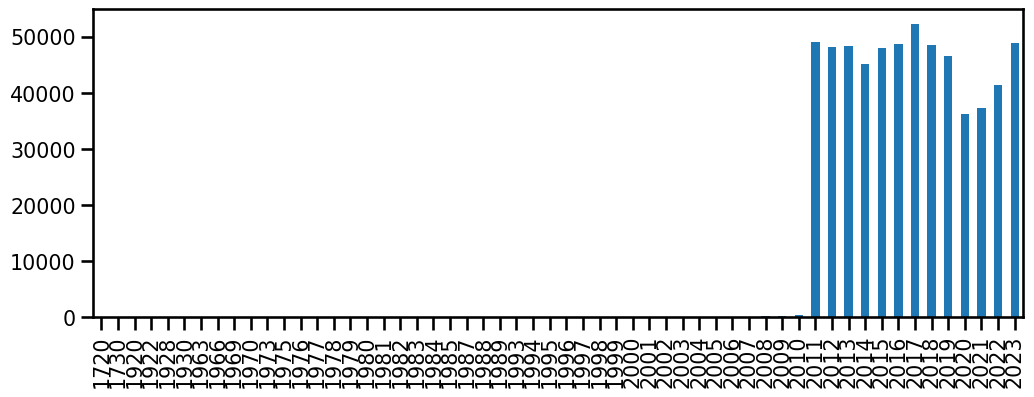

In [11]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');

In [12]:
## keeping 2011 to present
df = df.loc['2011':]
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 00:00:00+00:00',
               '2011-01-01 00:00:00+00:00', '2011-01-01 00:01:00+00:00',
               '2011-01-01 00:01:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:05:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:10:00+00:00', '2011-01-01 00:15:00+00:00',
               ...
               '2023-12-19 19:00:00+00:00', '2023-12-19 19:00:00+00:00',
               '2023-12-19 19:20:00+00:00', '2023-12-19 19:24:00+00:00',
               '2023-12-19 19:38:00+00:00', '2023-12-19 20:00:00+00:00',
               '2023-12-19 20:48:00+00:00', '2023-12-19 21:30:00+00:00',
               '2023-12-19 21:41:00+00:00', '2023-12-19 22:15:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=598521, freq=None)

<Axes: >

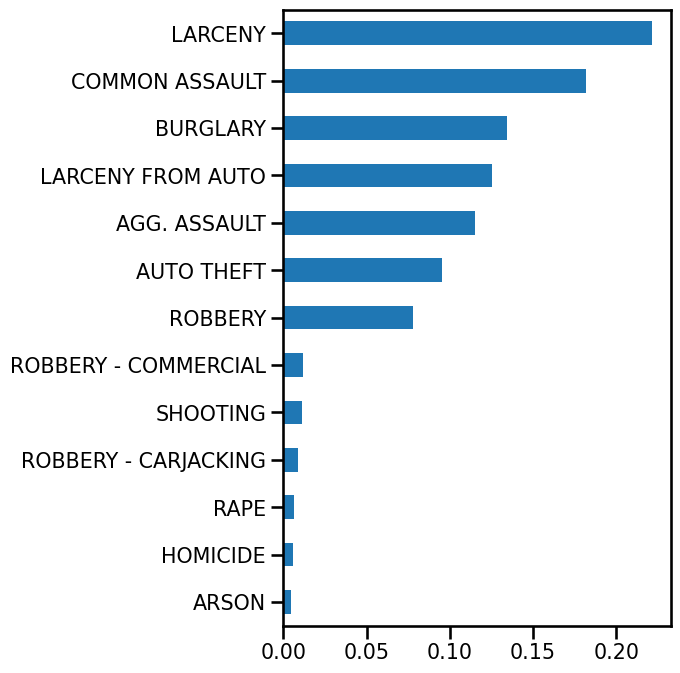

In [13]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

In [14]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts

Total # of Crimes
LARCENY                          132681
COMMON ASSAULT                   108653
BURGLARY                          80562
LARCENY FROM AUTO                 75148
AGG. ASSAULT                      68785
AUTO THEFT                        57194
ROBBERY                           46687
ROBBERY - COMMERCIAL               7160
SHOOTING                           6668
ROBBERY - CARJACKING               5138
RAPE                               3809
HOMICIDE                           3422
ARSON                              2614

In [15]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

In [16]:
## demoing groupby with .counts() vs .size()
df.groupby("Description").count().head()

X       Y   RowID  CCNumber  CrimeCode  Inside_Outside  \
Description                                                                   
AGG. ASSAULT     68674   68674   68785     68785      68785           62084   
ARSON             2607    2607    2614      2614       2614            2398   
AUTO THEFT       57083   57083   57194     57194      57194           53442   
BURGLARY         80512   80512   80562     80562      80562           75703   
COMMON ASSAULT  108519  108519  108653    108653     108653           98404   

                Weapon    Post  Gender     Age    Race  Ethnicity  Location  \
Description                                                                   
AGG. ASSAULT     67247   67865   65901   64317   67922      11338     68295   
ARSON             2244    2566    1978    1558    2469        199      2602   
AUTO THEFT          77   56300   51650   50570   54345      12615     56752   
BURGLARY           244   80110   62257   56471   75810       4908     80368   
COMMON ASSAULT   21398  107455  104174  100448  107320      17090    108055   

                Old_District  New_District  Neighborhood  Latitude  Longitude  \
Description                                                                     
AGG. ASSAULT           65367          2499         67770     68674      68674   
ARSON                   2468            98          2564      2607       2607   
AUTO THEFT             49894          6403         56242     57083      57083   
BURGLARY               78233          1876         80061     80512      80512   
COMMON ASSAULT        103416          4039        107317    108519     108519   

                GeoLocation  PremiseType  Total_Incidents  
Description                                                
AGG. ASSAULT          68785        62084            68785  
ARSON                  2614         2398             2614  
AUTO THEFT            57194        53442            57194  
BURGLARY              80562        75703            80562  
COMMON ASSAULT       108653        98404           108653

In [17]:
df.groupby("Description").size().head()

Description
AGG. ASSAULT       68785
ARSON               2614
AUTO THEFT         57194
BURGLARY           80562
COMMON ASSAULT    108653
dtype: int64

In [18]:
## making our dictionary 
CRIMES = {}

In [19]:
## Lets test 1 crime before we create our loop
crime ='ROBBERY'
crime

'ROBBERY'

In [20]:
# I. Save a temp df of just the rows that match the crime
temp = df.loc[ df['Description']==crime]
temp.head(3)

X          Y   RowID  CCNumber CrimeCode  \
CrimeDateTime                                                                 
2011-01-01 02:45:00+00:00 -76.593990  39.297354  544091  11A00126       3AF   
2011-01-01 04:25:00+00:00 -76.658482  39.342387  547637  11A00157        3B   
2011-01-01 04:55:00+00:00 -76.598510  39.292969  552872  11A00161        3B   

                          Description Inside_Outside   Weapon   Post Gender  \
CrimeDateTime                                                                 
2011-01-01 02:45:00+00:00     ROBBERY              O  FIREARM  321.0      M   
2011-01-01 04:25:00+00:00     ROBBERY              I      NaN  532.0      F   
2011-01-01 04:55:00+00:00     ROBBERY              O      NaN  212.0      M   

                            Age                       Race Ethnicity  \
CrimeDateTime                                                          
2011-01-01 02:45:00+00:00  22.0  BLACK_OR_AFRICAN_AMERICAN       NaN   
2011-01-01 04:25:00+00:00  23.0  BLACK_OR_AFRICAN_AMERICAN       NaN   
2011-01-01 04:55:00+00:00  55.0  BLACK_OR_AFRICAN_AMERICAN       NaN   

                                       Location Old_District New_District  \
CrimeDateTime                                                               
2011-01-01 02:45:00+00:00          600 BROADWAY      EASTERN          NaN   
2011-01-01 04:25:00+00:00  2500 EDGECOMBE CIR N     NORTHERN          NaN   
2011-01-01 04:55:00+00:00     1400 E FAYETTE ST    SOUTHEAST          NaN   

                              Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                      
2011-01-01 02:45:00+00:00  DUNBAR-BROADWAY  39.297354 -76.593990   
2011-01-01 04:25:00+00:00         PARKLANE  39.342387 -76.658482   
2011-01-01 04:55:00+00:00  DUNBAR-BROADWAY  39.292969 -76.598510   

                                                        GeoLocation  \
CrimeDateTime                                                         
2011-01-01 02:45:00+00:00                     (39.297354,-76.59399)   
2011-01-01 04:25:00+00:00                    (39.342387,-76.658482)   
2011-01-01 04:55:00+00:00  (39.292968763700166,-76.598509626981652)   

                                    PremiseType  Total_Incidents  
CrimeDateTime                                                     
2011-01-01 02:45:00+00:00  STREET                              1  
2011-01-01 04:25:00+00:00  APT/CONDO - OCCUPIED                1  
2011-01-01 04:55:00+00:00  STREET                              1

In [21]:
# II. Resample the temp DataFrame as Daily data (crime counts)
# and keep ONLY the .size()
temp_res = temp.resample("D").size()
temp_res

CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2023-12-15 00:00:00+00:00    12
2023-12-16 00:00:00+00:00    10
2023-12-17 00:00:00+00:00    18
2023-12-18 00:00:00+00:00    13
2023-12-19 00:00:00+00:00     2
Freq: D, Length: 4736, dtype: int64

In [22]:
#III. Save the temporary DataFrame in the dictionary, #using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['ROBBERY'])

In [23]:
CRIMES['ROBBERY']

CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2023-12-15 00:00:00+00:00    12
2023-12-16 00:00:00+00:00    10
2023-12-17 00:00:00+00:00    18
2023-12-18 00:00:00+00:00    13
2023-12-19 00:00:00+00:00     2
Freq: D, Length: 4736, dtype: int64

In [24]:
# 1. get list of  unique crime descriptions
crime_list = df['Description'].unique()
crime_list

array(['LARCENY', 'RAPE', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'BURGLARY',
       'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL',
       'ARSON', 'HOMICIDE', 'ROBBERY - CARJACKING', 'SHOOTING'],
      dtype=object)

In [25]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Description']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['LARCENY', 'RAPE', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'BURGLARY', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE', 'ROBBERY - CARJACKING', 'SHOOTING'])

In [26]:
CRIMES['SHOOTING']

CrimeDateTime
2012-01-20 00:00:00+00:00    1
2012-01-21 00:00:00+00:00    0
2012-01-22 00:00:00+00:00    0
2012-01-23 00:00:00+00:00    0
2012-01-24 00:00:00+00:00    0
                            ..
2023-12-15 00:00:00+00:00    1
2023-12-16 00:00:00+00:00    1
2023-12-17 00:00:00+00:00    4
2023-12-18 00:00:00+00:00    0
2023-12-19 00:00:00+00:00    1
Freq: D, Length: 4352, dtype: int64

In [27]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

LARCENY  RAPE  AGG. ASSAULT  LARCENY FROM AUTO  \
CrimeDateTime                                                               
2011-01-01 00:00:00+00:00       39   5.0            28                 27   
2011-01-02 00:00:00+00:00       20   2.0             6                 20   
2011-01-03 00:00:00+00:00       19   1.0            13                 16   
2011-01-04 00:00:00+00:00       29   1.0            11                 12   
2011-01-05 00:00:00+00:00       30   0.0             9                 14   
...                            ...   ...           ...                ...   
2023-12-15 00:00:00+00:00       24   NaN            10                  8   
2023-12-16 00:00:00+00:00       26   NaN            17                  9   
2023-12-17 00:00:00+00:00       19   NaN            11                 15   
2023-12-18 00:00:00+00:00       28   NaN             4                  9   
2023-12-19 00:00:00+00:00       15   NaN            10                  2   

                           BURGLARY  COMMON ASSAULT  AUTO THEFT  ROBBERY  \
CrimeDateTime                                                              
2011-01-01 00:00:00+00:00        21              41          15        5   
2011-01-02 00:00:00+00:00        19              14           5       10   
2011-01-03 00:00:00+00:00        21              15           7        9   
2011-01-04 00:00:00+00:00        12              29          10        4   
2011-01-05 00:00:00+00:00        28              26          10        6   
...                             ...             ...         ...      ...   
2023-12-15 00:00:00+00:00         7              26          14       12   
2023-12-16 00:00:00+00:00         6              16          21       10   
2023-12-17 00:00:00+00:00         5              39          22       18   
2023-12-18 00:00:00+00:00         8              26          17       13   
2023-12-19 00:00:00+00:00         4              14           7        2   

                           ROBBERY - COMMERCIAL  ARSON  HOMICIDE  \
CrimeDateTime                                                      
2011-01-01 00:00:00+00:00                   2.0    1.0       NaN   
2011-01-02 00:00:00+00:00                   1.0    0.0       NaN   
2011-01-03 00:00:00+00:00                   1.0    0.0       NaN   
2011-01-04 00:00:00+00:00                   0.0    0.0       NaN   
2011-01-05 00:00:00+00:00                   2.0    0.0       NaN   
...                                         ...    ...       ...   
2023-12-15 00:00:00+00:00                   3.0    NaN       1.0   
2023-12-16 00:00:00+00:00                   1.0    NaN       1.0   
2023-12-17 00:00:00+00:00                   1.0    NaN       2.0   
2023-12-18 00:00:00+00:00                   2.0    NaN       0.0   
2023-12-19 00:00:00+00:00                   NaN    NaN       1.0   

                           ROBBERY - CARJACKING  SHOOTING  
CrimeDateTime                                              
2011-01-01 00:00:00+00:00                   NaN       NaN  
2011-01-02 00:00:00+00:00                   NaN       NaN  
2011-01-03 00:00:00+00:00                   NaN       NaN  
2011-01-04 00:00:00+00:00                   NaN       NaN  
2011-01-05 00:00:00+00:00                   NaN       NaN  
...                                         ...       ...  
2023-12-15 00:00:00+00:00                   2.0       1.0  
2023-12-16 00:00:00+00:00                   1.0       1.0  
2023-12-17 00:00:00+00:00                   1.0       4.0  
2023-12-18 00:00:00+00:00                   NaN       0.0  
2023-12-19 00:00:00+00:00                   NaN       1.0  

[4736 rows x 13 columns]

In [28]:
## saving to disk for later
crimes_df.to_csv("Data/baltimore_crime_counts_2023.csv")

# Timezones

In [29]:
## testing our saved data
df = pd.read_csv("Data/baltimore_crime_counts_2023.csv", parse_dates=['CrimeDateTime'], index_col=0)

In [30]:
## check our df.index
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-02 00:00:00+00:00',
               '2011-01-03 00:00:00+00:00', '2011-01-04 00:00:00+00:00',
               '2011-01-05 00:00:00+00:00', '2011-01-06 00:00:00+00:00',
               '2011-01-07 00:00:00+00:00', '2011-01-08 00:00:00+00:00',
               '2011-01-09 00:00:00+00:00', '2011-01-10 00:00:00+00:00',
               ...
               '2023-12-10 00:00:00+00:00', '2023-12-11 00:00:00+00:00',
               '2023-12-12 00:00:00+00:00', '2023-12-13 00:00:00+00:00',
               '2023-12-14 00:00:00+00:00', '2023-12-15 00:00:00+00:00',
               '2023-12-16 00:00:00+00:00', '2023-12-17 00:00:00+00:00',
               '2023-12-18 00:00:00+00:00', '2023-12-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=4736, freq=None)

In [31]:
# Seeing if resampling will remove the excess zeroes
df = df.resample('D').asfreq()
df.head(3)

LARCENY  RAPE  AGG. ASSAULT  LARCENY FROM AUTO  \
CrimeDateTime                                                               
2011-01-01 00:00:00+00:00       39   5.0            28                 27   
2011-01-02 00:00:00+00:00       20   2.0             6                 20   
2011-01-03 00:00:00+00:00       19   1.0            13                 16   

                           BURGLARY  COMMON ASSAULT  AUTO THEFT  ROBBERY  \
CrimeDateTime                                                              
2011-01-01 00:00:00+00:00        21              41          15        5   
2011-01-02 00:00:00+00:00        19              14           5       10   
2011-01-03 00:00:00+00:00        21              15           7        9   

                           ROBBERY - COMMERCIAL  ARSON  HOMICIDE  \
CrimeDateTime                                                      
2011-01-01 00:00:00+00:00                   2.0    1.0       NaN   
2011-01-02 00:00:00+00:00                   1.0    0.0       NaN   
2011-01-03 00:00:00+00:00                   1.0    0.0       NaN   

                           ROBBERY - CARJACKING  SHOOTING  
CrimeDateTime                                              
2011-01-01 00:00:00+00:00                   NaN       NaN  
2011-01-02 00:00:00+00:00                   NaN       NaN  
2011-01-03 00:00:00+00:00                   NaN       NaN

In [32]:
# Slicing first value
ts0 = df.index[0]
ts0

Timestamp('2011-01-01 00:00:00+0000', tz='UTC', freq='D')

In [33]:
# checking the documentation for astimezone
ts0.astimezone?

Signature: ts0.astimezone(tz)
Docstring:
Convert timezone-aware Timestamp to another time zone.

Parameters
----------
tz : str, pytz.timezone, dateutil.tz.tzfile or None
    Time zone for time which Timestamp will be converted to.
    None will remove timezone holding UTC time.

Returns
-------
converted : Timestamp

Raises
------
TypeError
    If Timestamp is tz-naive.

Examples
--------
Create a timestamp object with UTC timezone:

>>> ts = pd.Timestamp('2020-03-14T15:32:52.192548651', tz='UTC')
>>> ts
Timestamp('2020-03-14 15:32:52.192548651+0000', tz='UTC')

Change to Tokyo timezone:

>>> ts.tz_convert(tz='Asia/Tokyo')
Timestamp('2020-03-15 00:32:52.192548651+0900', tz='Asia/Tokyo')

Can also use ``astimezone``:

>>> ts.astimezone(tz='Asia/Tokyo')
Timestamp('2020-03-15 00:32:52.192548651+0900', tz='Asia/Tokyo')

Analogous for ``pd.NaT``:

>>> pd.NaT.tz_convert(tz='Asia/Tokyo')
NaT
Type:      method

In [34]:
import pytz
all_tzs = pytz.all_timezones
len(all_tzs)

596

In [35]:
## getting just US timezones
[tz for tz in all_tzs if tz.startswith('US')]

['US/Alaska',
 'US/Aleutian',
 'US/Arizona',
 'US/Central',
 'US/East-Indiana',
 'US/Eastern',
 'US/Hawaii',
 'US/Indiana-Starke',
 'US/Michigan',
 'US/Mountain',
 'US/Pacific',
 'US/Samoa']

In [36]:
## let's try converting to US Eastern
ts0.astimezone('US/Eastern')

Timestamp('2010-12-31 19:00:00-0500', tz='US/Eastern', freq='D')

In [37]:
## Viewing original 
ts0

Timestamp('2011-01-01 00:00:00+0000', tz='UTC', freq='D')

In [38]:
## let's try converting to US Pacific
ts0.astimezone('US/Pacific')

Timestamp('2010-12-31 16:00:00-0800', tz='US/Pacific', freq='D')

In [39]:
## remove time zone from the dt index to convert to "timezone naive" df
df1 = df.tz_convert(None)
df1.head(3)

LARCENY  RAPE  AGG. ASSAULT  LARCENY FROM AUTO  BURGLARY  \
CrimeDateTime                                                             
2011-01-01          39   5.0            28                 27        21   
2011-01-02          20   2.0             6                 20        19   
2011-01-03          19   1.0            13                 16        21   

               COMMON ASSAULT  AUTO THEFT  ROBBERY  ROBBERY - COMMERCIAL  \
CrimeDateTime                                                              
2011-01-01                 41          15        5                   2.0   
2011-01-02                 14           5       10                   1.0   
2011-01-03                 15           7        9                   1.0   

               ARSON  HOMICIDE  ROBBERY - CARJACKING  SHOOTING  
CrimeDateTime                                                   
2011-01-01       1.0       NaN                   NaN       NaN  
2011-01-02       0.0       NaN                   NaN       NaN  
2011-01-03       0.0       NaN                   NaN       NaN

# Binning Time Series

In [40]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [41]:
# Now revisiting original dataset
df = pd.read_csv("Data/Part_1_Crime_Data.csv",
                 low_memory=False)
## Converting crimedatetime and coercing errors
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')
df = df.dropna(subset=['CrimeDateTime'])
## setting and sorting the index
df = df.set_index("CrimeDateTime")
df = df.sort_index()
df.head(3)

X          Y   RowID  CCNumber CrimeCode  \
CrimeDateTime                                                                 
1720-08-14 02:56:02+00:00 -76.605440  39.300101  548436  23H06330        6F   
1730-09-03 18:26:02+00:00 -76.614148  39.279043  548435  23I01590        6D   
1920-06-18 01:30:00+00:00 -76.566719  39.291959  548434  22F05949       3AO   

                                 Description Inside_Outside            Weapon  \
CrimeDateTime                                                                   
1720-08-14 02:56:02+00:00            LARCENY        Outside               NaN   
1730-09-03 18:26:02+00:00  LARCENY FROM AUTO         Inside               NaN   
1920-06-18 01:30:00+00:00            ROBBERY         Inside  PERSONAL_WEAPONS   

                            Post Gender   Age                       Race  \
CrimeDateTime                                                              
1720-08-14 02:56:02+00:00  324.0      F  39.0  BLACK_OR_AFRICAN_AMERICAN   
1730-09-03 18:26:02+00:00  942.0      F   0.0                      WHITE   
1920-06-18 01:30:00+00:00  223.0      M  20.0                      WHITE   

                                    Ethnicity           Location Old_District  \
CrimeDateTime                                                                   
1720-08-14 02:56:02+00:00             UNKNOWN    800 MC ALEER CT      EASTERN   
1730-09-03 18:26:02+00:00             UNKNOWN   0 E HENRIETTA ST     SOUTHERN   
1920-06-18 01:30:00+00:00  HISPANIC_OR_LATINO  3700 LEVERTON AVE    SOUTHEAST   

                          New_District         Neighborhood   Latitude  \
CrimeDateTime                                                            
1720-08-14 02:56:02+00:00          NaN              OLDTOWN  39.300101   
1730-09-03 18:26:02+00:00          NaN         FEDERAL HILL  39.279043   
1920-06-18 01:30:00+00:00          NaN  BALTIMORE HIGHLANDS  39.291959   

                           Longitude  \
CrimeDateTime                          
1720-08-14 02:56:02+00:00 -76.605440   
1730-09-03 18:26:02+00:00 -76.614148   
1920-06-18 01:30:00+00:00 -76.566719   

                                                        GeoLocation  \
CrimeDateTime                                                         
1720-08-14 02:56:02+00:00  (39.300100999999998,-76.605440000000002)   
1730-09-03 18:26:02+00:00           (39.279043000000001,-76.614148)   
1920-06-18 01:30:00+00:00  (39.291958801114234,-76.566719001516489)   

                                 PremiseType  Total_Incidents  
CrimeDateTime                                                  
1720-08-14 02:56:02+00:00  OTHER/RESIDENTIAL                1  
1730-09-03 18:26:02+00:00             STREET                1  
1920-06-18 01:30:00+00:00             STREET                1

In [42]:
## baltimore is in eastern time zone,but can just use tz-naive index by choosing None
df = df.tz_convert(None)
df.head(3)

X          Y   RowID  CCNumber CrimeCode  \
CrimeDateTime                                                           
1720-08-14 02:56:02 -76.605440  39.300101  548436  23H06330        6F   
1730-09-03 18:26:02 -76.614148  39.279043  548435  23I01590        6D   
1920-06-18 01:30:00 -76.566719  39.291959  548434  22F05949       3AO   

                           Description Inside_Outside            Weapon  \
CrimeDateTime                                                             
1720-08-14 02:56:02            LARCENY        Outside               NaN   
1730-09-03 18:26:02  LARCENY FROM AUTO         Inside               NaN   
1920-06-18 01:30:00            ROBBERY         Inside  PERSONAL_WEAPONS   

                      Post Gender   Age                       Race  \
CrimeDateTime                                                        
1720-08-14 02:56:02  324.0      F  39.0  BLACK_OR_AFRICAN_AMERICAN   
1730-09-03 18:26:02  942.0      F   0.0                      WHITE   
1920-06-18 01:30:00  223.0      M  20.0                      WHITE   

                              Ethnicity           Location Old_District  \
CrimeDateTime                                                             
1720-08-14 02:56:02             UNKNOWN    800 MC ALEER CT      EASTERN   
1730-09-03 18:26:02             UNKNOWN   0 E HENRIETTA ST     SOUTHERN   
1920-06-18 01:30:00  HISPANIC_OR_LATINO  3700 LEVERTON AVE    SOUTHEAST   

                    New_District         Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                                 
1720-08-14 02:56:02          NaN              OLDTOWN  39.300101 -76.605440   
1730-09-03 18:26:02          NaN         FEDERAL HILL  39.279043 -76.614148   
1920-06-18 01:30:00          NaN  BALTIMORE HIGHLANDS  39.291959 -76.566719   

                                                  GeoLocation  \
CrimeDateTime                                                   
1720-08-14 02:56:02  (39.300100999999998,-76.605440000000002)   
1730-09-03 18:26:02           (39.279043000000001,-76.614148)   
1920-06-18 01:30:00  (39.291958801114234,-76.566719001516489)   

                           PremiseType  Total_Incidents  
CrimeDateTime                                            
1720-08-14 02:56:02  OTHER/RESIDENTIAL                1  
1730-09-03 18:26:02             STREET                1  
1920-06-18 01:30:00             STREET                1

In [43]:
## Drop extra columns not needed
drop_cols = ['X','Y','RowID','CCNumber','Post','GeoLocation', 'Location','PremiseType']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 599548 entries, 1720-08-14 02:56:02 to 2023-12-19 22:15:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeCode        599548 non-null  object 
 1   Description      599548 non-null  object 
 2   Inside_Outside   544094 non-null  object 
 3   Weapon           145839 non-null  object 
 4   Gender           503822 non-null  object 
 5   Age              482830 non-null  float64
 6   Race             574741 non-null  object 
 7   Ethnicity        72677 non-null   object 
 8   Old_District     567355 non-null  object 
 9   New_District     24325 non-null   object 
 10  Neighborhood     591038 non-null  object 
 11  Latitude         598561 non-null  float64
 12  Longitude        598561 non-null  float64
 13  Total_Incidents  599548 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 68.6+ MB


In [44]:
## saving just the date (no time) as a column
df['Date'] = df.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

CrimeCode        Description Inside_Outside  \
CrimeDateTime                                                     
1720-08-14 02:56:02        6F            LARCENY        Outside   
1730-09-03 18:26:02        6D  LARCENY FROM AUTO         Inside   
1920-06-18 01:30:00       3AO            ROBBERY         Inside   

                               Weapon Gender   Age                       Race  \
CrimeDateTime                                                                   
1720-08-14 02:56:02               NaN      F  39.0  BLACK_OR_AFRICAN_AMERICAN   
1730-09-03 18:26:02               NaN      F   0.0                      WHITE   
1920-06-18 01:30:00  PERSONAL_WEAPONS      M  20.0                      WHITE   

                              Ethnicity Old_District New_District  \
CrimeDateTime                                                       
1720-08-14 02:56:02             UNKNOWN      EASTERN          NaN   
1730-09-03 18:26:02             UNKNOWN     SOUTHERN          NaN   
1920-06-18 01:30:00  HISPANIC_OR_LATINO    SOUTHEAST          NaN   

                            Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                    
1720-08-14 02:56:02              OLDTOWN  39.300101 -76.605440   
1730-09-03 18:26:02         FEDERAL HILL  39.279043 -76.614148   
1920-06-18 01:30:00  BALTIMORE HIGHLANDS  39.291959 -76.566719   

                     Total_Incidents        Date  
CrimeDateTime                                     
1720-08-14 02:56:02                1  1720-08-14  
1730-09-03 18:26:02                1  1730-09-03  
1920-06-18 01:30:00                1  1920-06-18

In [45]:
## Engineering Features using components of the date/time
df['Year']  = df.index.year

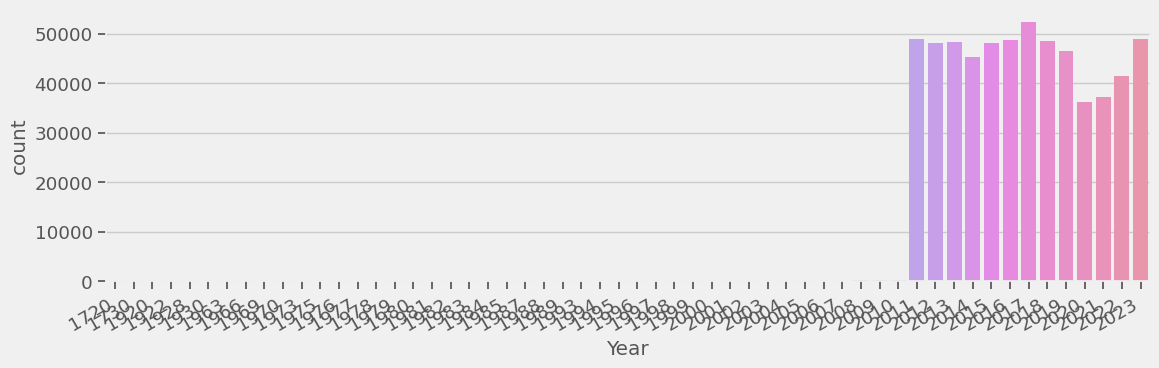

In [46]:
## Visualize years
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [47]:
# Checking value counts to find oldest data
df['Year'].value_counts().sort_index(ascending = False).head(15)

2023    48915
2022    41393
2021    37205
2020    36283
2019    46588
2018    48575
2017    52273
2016    48652
2015    48045
2014    45196
2013    48306
2012    48123
2011    48967
2010      349
2009      211
Name: Year, dtype: int64

In [48]:
## keeping data from yr 2011 to present
df = df.loc['2011':'2022'].copy()

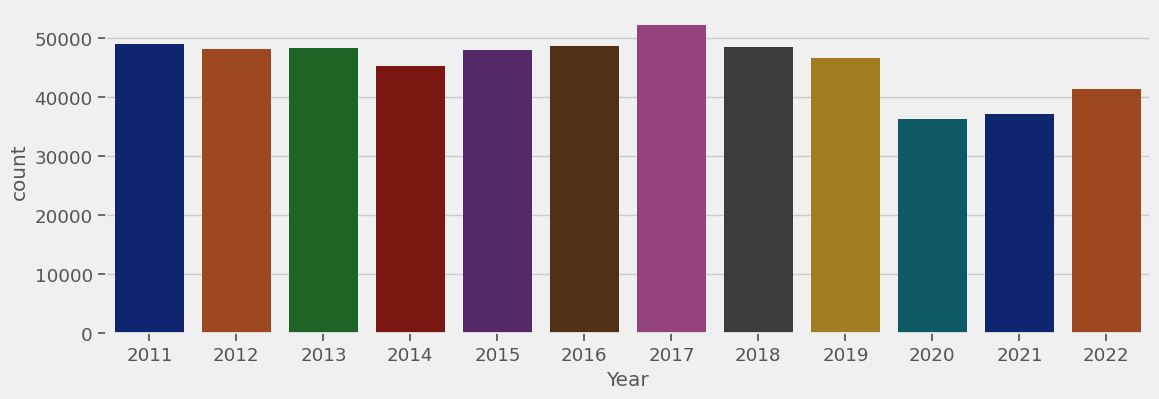

In [49]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

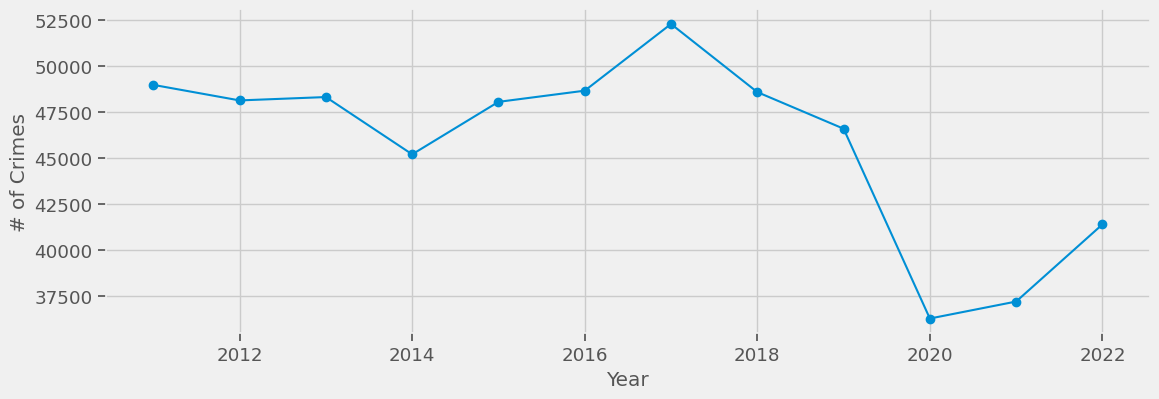

In [50]:
## save year counts
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [51]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                            
2011-01-01           6E     LARCENY              O    NaN      M  44.0   
2011-01-01           2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01           6G     LARCENY              I    NaN      F  26.0   

                                    Race Ethnicity Old_District New_District  \
CrimeDateTime                                                                  
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01                         WHITE       NaN     SOUTHERN          NaN   

               Neighborhood   Latitude  Longitude  Total_Incidents  \
CrimeDateTime                                                        
2011-01-01           MOSHER  39.295633 -76.661518                1   
2011-01-01      HARLEM PARK  39.298964 -76.639291                1   
2011-01-01     FEDERAL HILL  39.276987 -76.613380                1   

                     Date  Year  Month MonthName  
CrimeDateTime                                     
2011-01-01     2011-01-01  2011      1   January  
2011-01-01     2011-01-01  2011      1   January  
2011-01-01     2011-01-01  2011      1   January

In [52]:
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

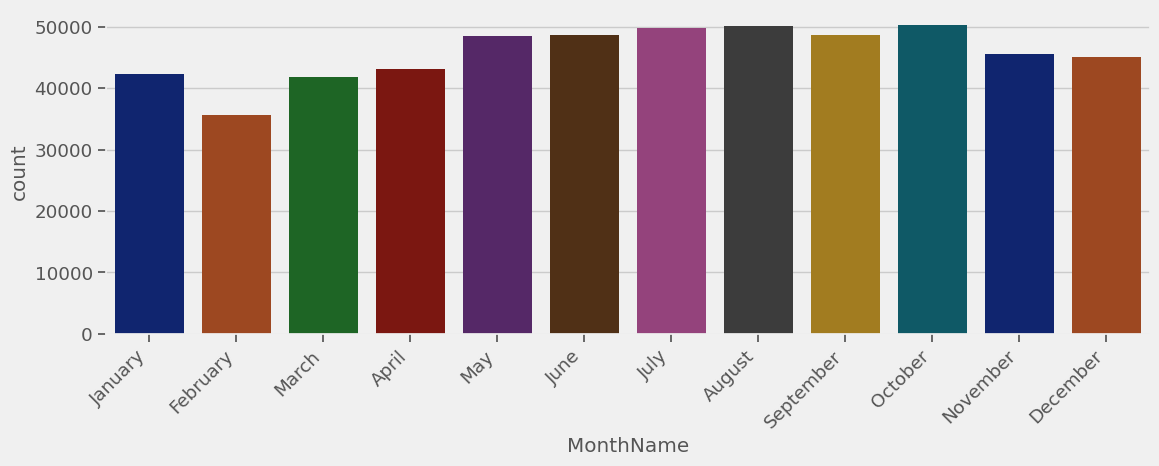

In [53]:
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

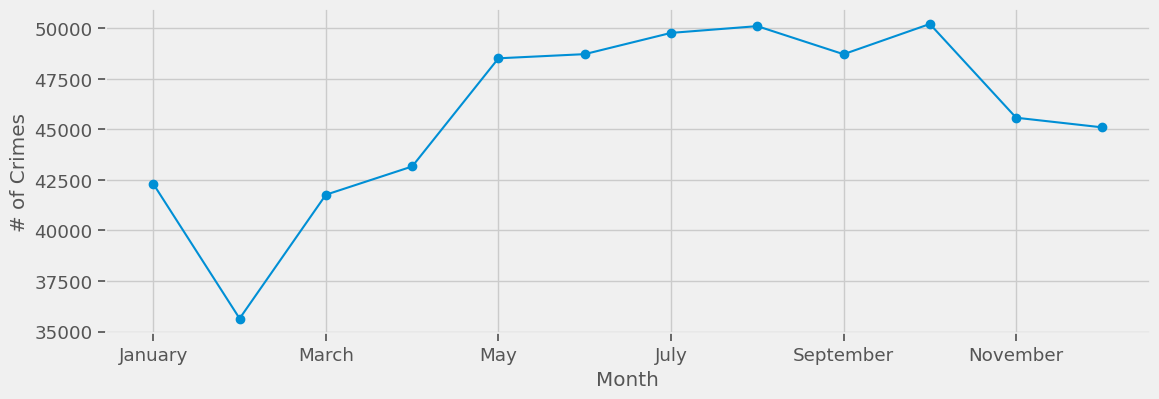

In [54]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [55]:
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                            
2011-01-01           6E     LARCENY              O    NaN      M  44.0   
2011-01-01           2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01           6G     LARCENY              I    NaN      F  26.0   

                                    Race Ethnicity Old_District New_District  \
CrimeDateTime                                                                  
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01                         WHITE       NaN     SOUTHERN          NaN   

               Neighborhood   Latitude  Longitude  Total_Incidents  \
CrimeDateTime                                                        
2011-01-01           MOSHER  39.295633 -76.661518                1   
2011-01-01      HARLEM PARK  39.298964 -76.639291                1   
2011-01-01     FEDERAL HILL  39.276987 -76.613380                1   

                     Date  Year  Month MonthName DayOfWeek  DayNum  
CrimeDateTime                                                       
2011-01-01     2011-01-01  2011      1   January  Saturday       5  
2011-01-01     2011-01-01  2011      1   January  Saturday       5  
2011-01-01     2011-01-01  2011      1   January  Saturday       5

In [56]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

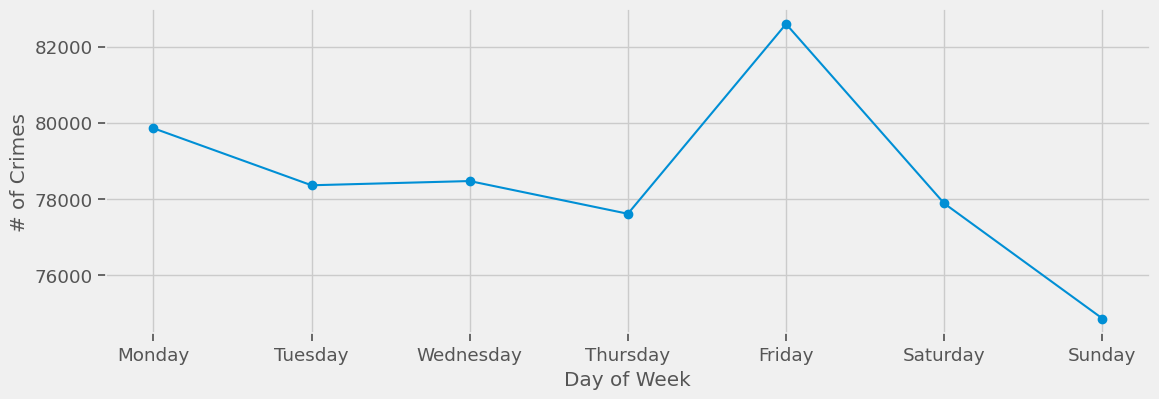

In [57]:
## save day counts
day_counts = df['DayNum'].value_counts().sort_index()
## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')

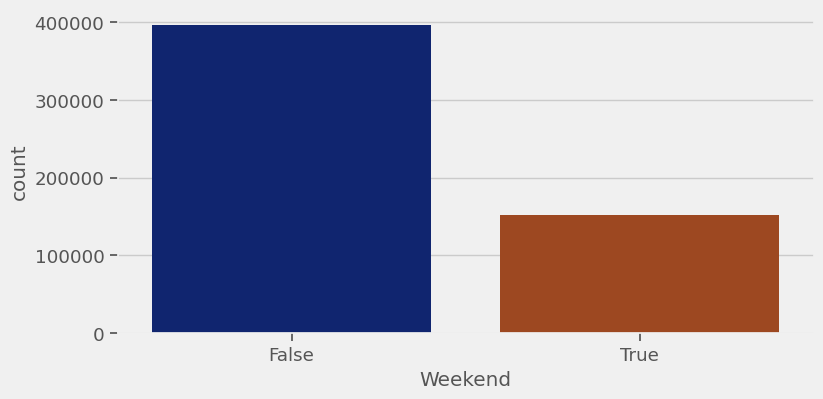

In [58]:
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

In [59]:
## calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

False    79375.2
True     76365.0
Name: Weekend, dtype: float64

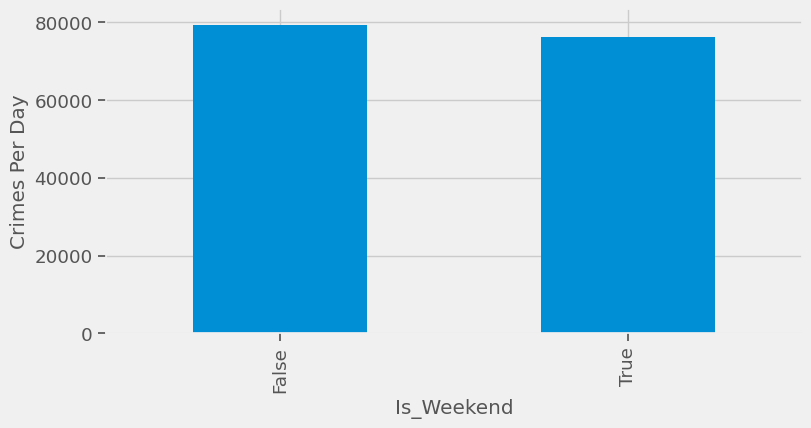

In [60]:
ax = weekend_counts.plot(kind='bar',figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');

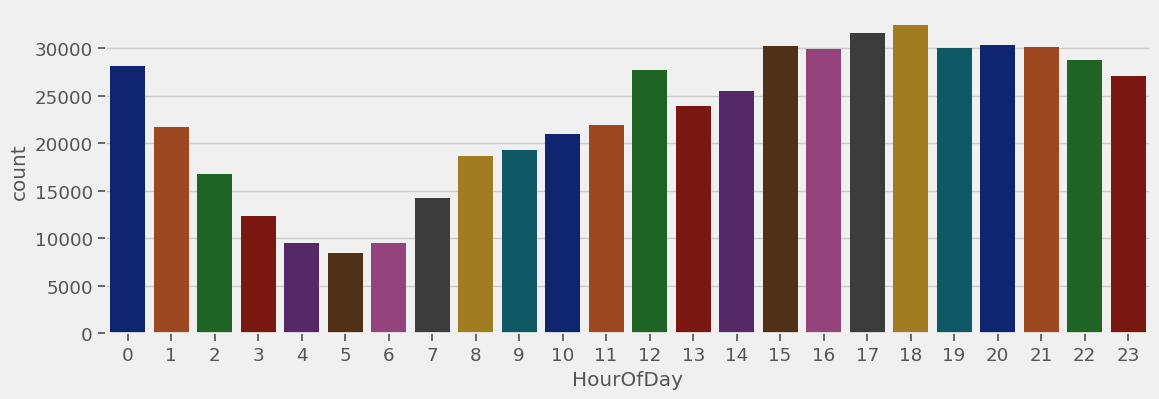

In [61]:
# adding hour of the day (12am=0) 
df['HourOfDay'] = df.index.hour 
sns.countplot(data=df, x='HourOfDay',palette='dark');

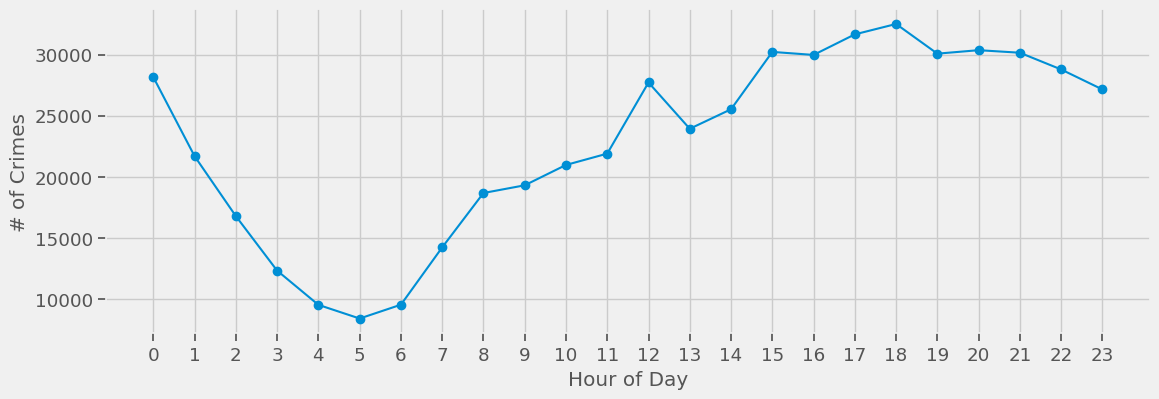

In [62]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()
# year_counts = df.groupby("Year").size()
ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);

# Seasonality

In [63]:
crimes = ['LARCENY','LARCENY FROM AUTO', 'AUTO THEFT','SHOOTING','ROBBERY - CARJACKING']
crimes_ts = df1[crimes].copy()
crimes_ts.head()

LARCENY  LARCENY FROM AUTO  AUTO THEFT  SHOOTING  \
CrimeDateTime                                                     
2011-01-01          39                 27          15       NaN   
2011-01-02          20                 20           5       NaN   
2011-01-03          19                 16           7       NaN   
2011-01-04          29                 12          10       NaN   
2011-01-05          30                 14          10       NaN   

               ROBBERY - CARJACKING  
CrimeDateTime                        
2011-01-01                      NaN  
2011-01-02                      NaN  
2011-01-03                      NaN  
2011-01-04                      NaN  
2011-01-05                      NaN

In [64]:
crimes_ts.isna().sum()

LARCENY                   0
LARCENY FROM AUTO         0
AUTO THEFT                0
SHOOTING                384
ROBBERY - CARJACKING      9
dtype: int64

In [65]:
## fill null values with 0
crimes_ts = crimes_ts.fillna(0)
crimes_ts

LARCENY  LARCENY FROM AUTO  AUTO THEFT  SHOOTING  \
CrimeDateTime                                                     
2011-01-01          39                 27          15       0.0   
2011-01-02          20                 20           5       0.0   
2011-01-03          19                 16           7       0.0   
2011-01-04          29                 12          10       0.0   
2011-01-05          30                 14          10       0.0   
...                ...                ...         ...       ...   
2023-12-15          24                  8          14       1.0   
2023-12-16          26                  9          21       1.0   
2023-12-17          19                 15          22       4.0   
2023-12-18          28                  9          17       0.0   
2023-12-19          15                  2           7       1.0   

               ROBBERY - CARJACKING  
CrimeDateTime                        
2011-01-01                      0.0  
2011-01-02                      0.0  
2011-01-03                      0.0  
2011-01-04                      0.0  
2011-01-05                      0.0  
...                             ...  
2023-12-15                      2.0  
2023-12-16                      1.0  
2023-12-17                      1.0  
2023-12-18                      0.0  
2023-12-19                      0.0  

[4736 rows x 5 columns]

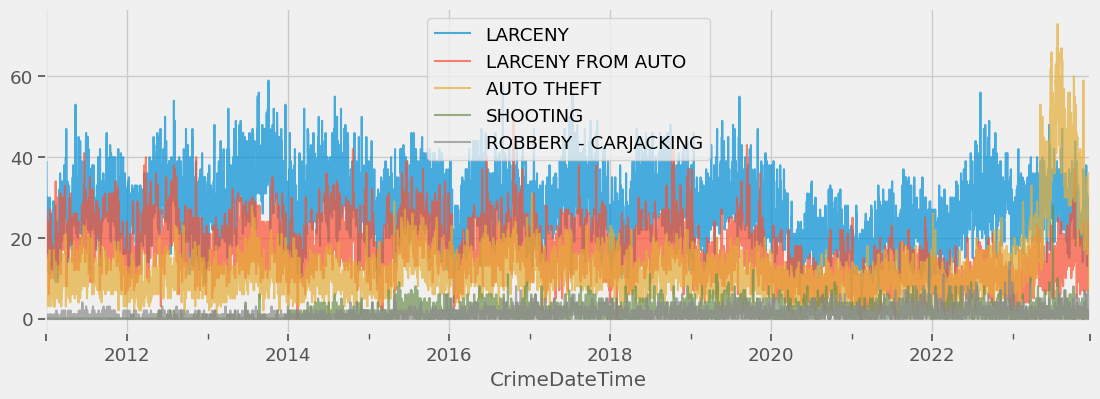

In [66]:
crimes_ts.plot(grid=True,alpha=0.7);

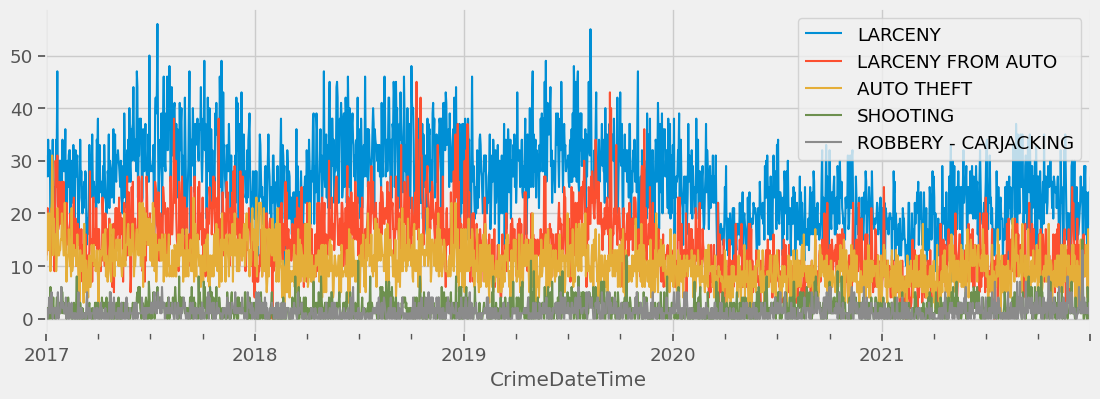

In [67]:
plot_df = crimes_ts.loc['2017':'2021']
plot_df.plot(grid=True);

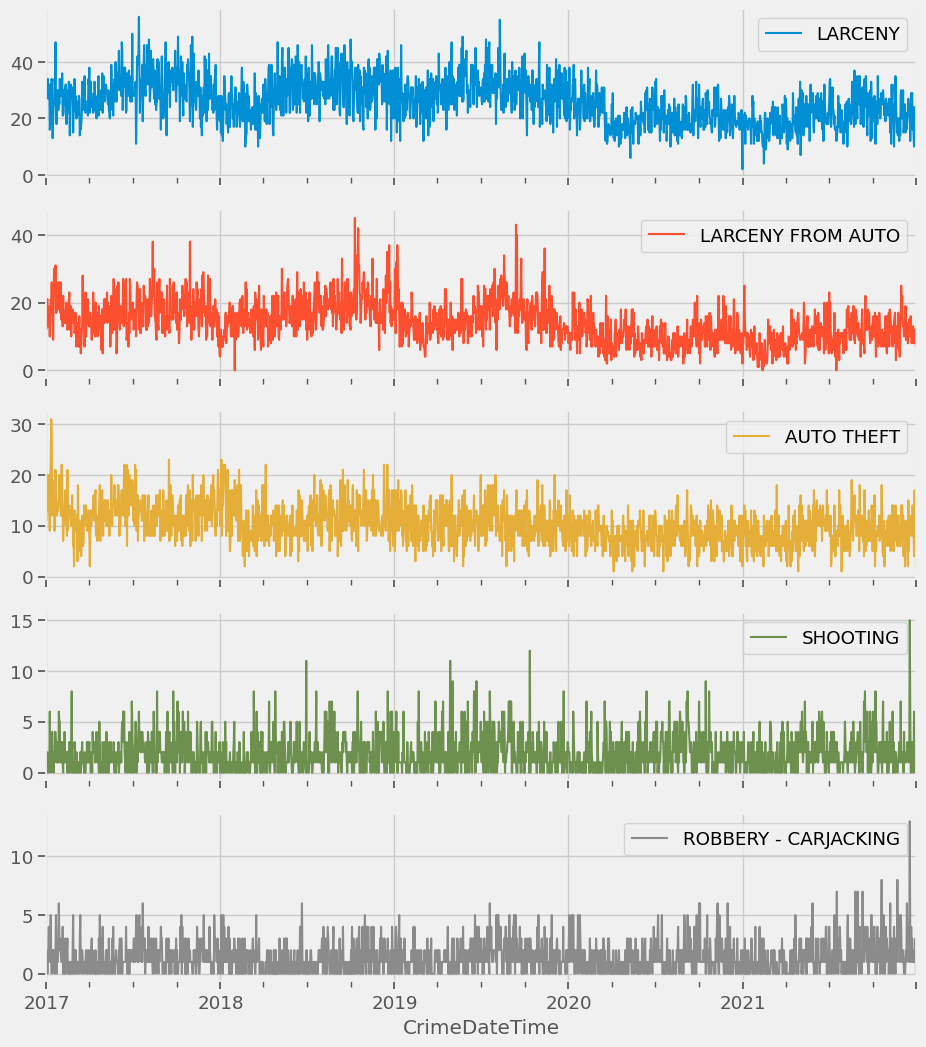

In [68]:
plot_df.plot(subplots=True,figsize=(10,12),grid=True);

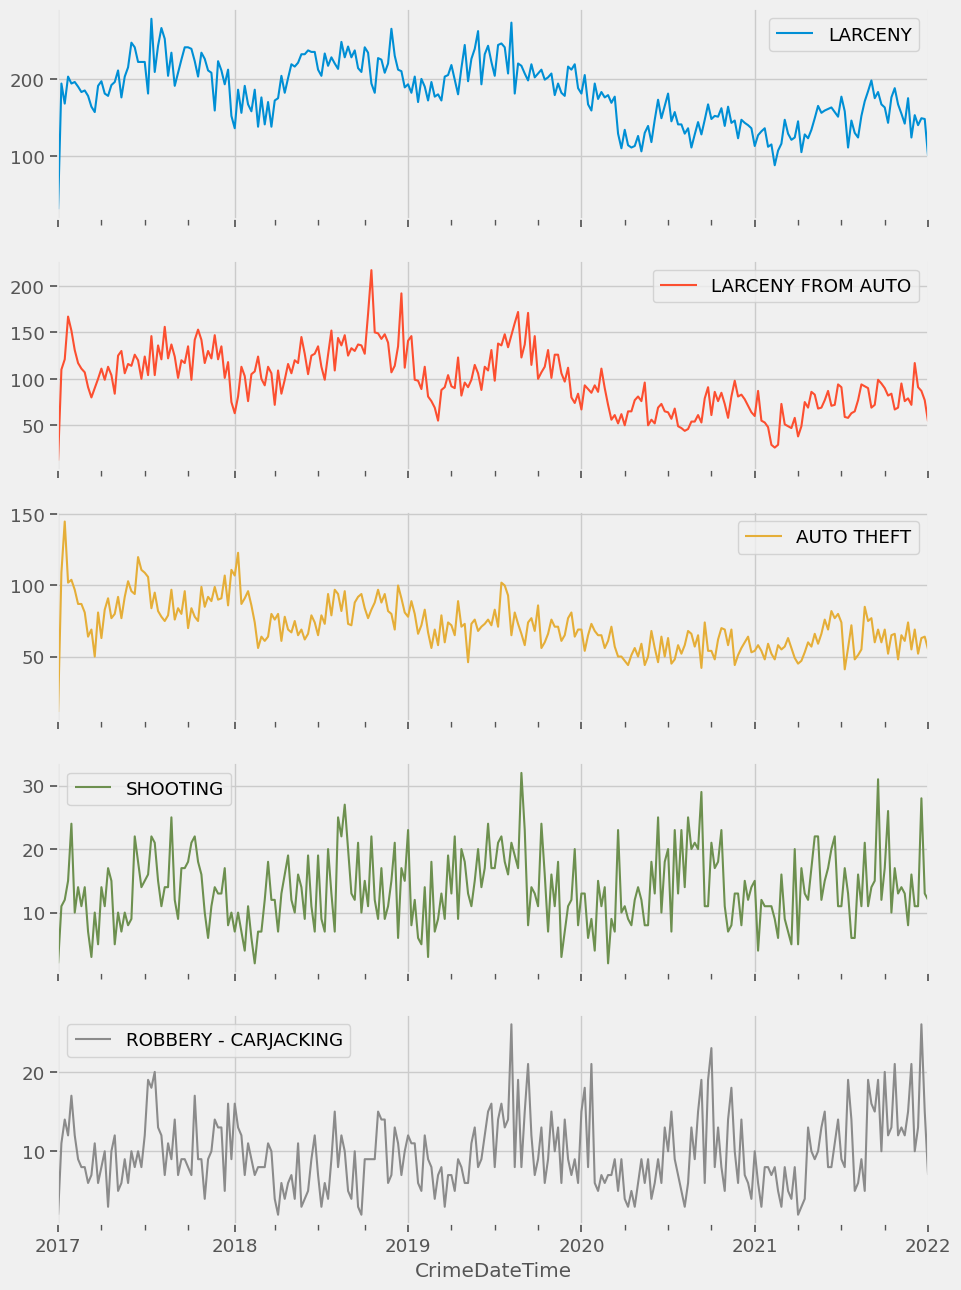

In [69]:
plot_df_W = crimes_ts.loc['2017':'2021'].resample('W').sum()
plot_df_W.plot(grid=True,subplots=True,figsize=(10,15));

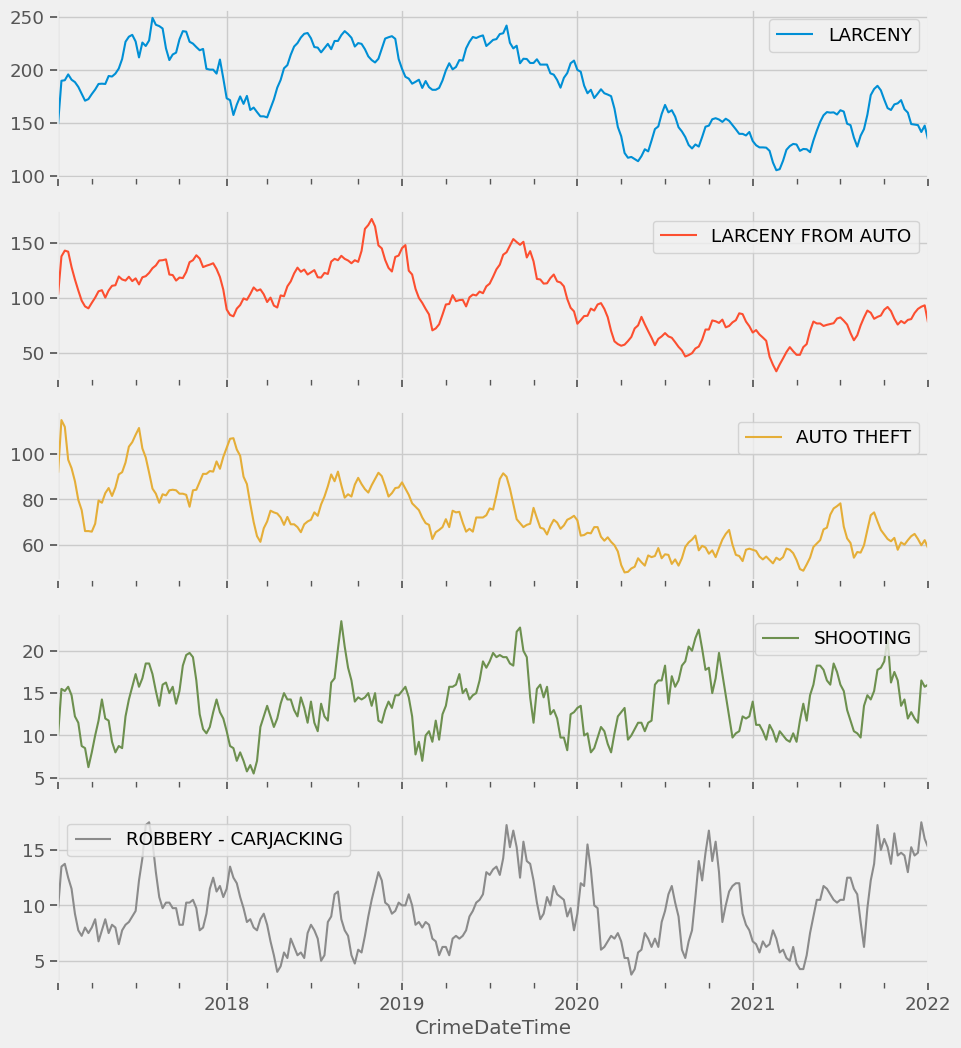

In [70]:
plot_df_W.rolling(4).mean().dropna().plot(subplots=True,figsize=(10,12));

In [71]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from 'C:\\Users\\Rovidicus\\anaconda3\\envs\\dojo-env\\lib\\site-packages\\statsmodels\\tsa\\api.py'>

In [72]:
crime_type = "LARCENY FROM AUTO"
ts = plot_df_W[crime_type]
ts.plot(title=crime_type)

<Axes: title={'center': 'LARCENY FROM AUTO'}, xlabel='CrimeDateTime'>

In [73]:
decomp = tsa.seasonal_decompose(ts)
decomp

In [74]:
fig = decomp.plot()

In [75]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [76]:
decomp.trend

CrimeDateTime
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2021-12-05   NaN
2021-12-12   NaN
2021-12-19   NaN
2021-12-26   NaN
2022-01-02   NaN
Freq: W-SUN, Name: trend, Length: 262, dtype: float64

In [77]:
decomp.trend.plot(title='Trend');

In [78]:
decomp.seasonal.head()

CrimeDateTime
2017-01-01   -15.614118
2017-01-08   -16.510753
2017-01-15     2.729632
2017-01-22    -9.700656
2017-01-29   -13.664599
Freq: W-SUN, Name: seasonal, dtype: float64

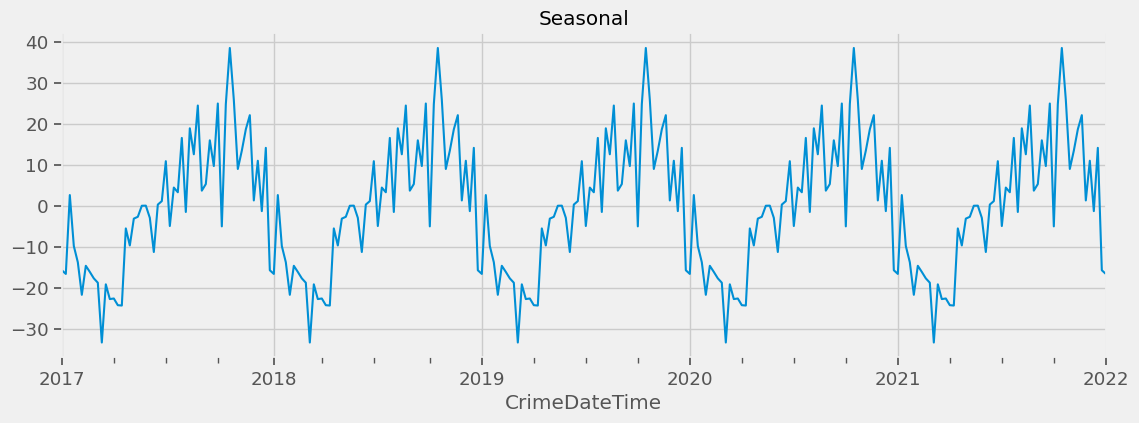

In [79]:
decomp.seasonal.plot(title='Seasonal');

In [80]:
decomp.resid.head()

CrimeDateTime
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
Freq: W-SUN, Name: resid, dtype: float64

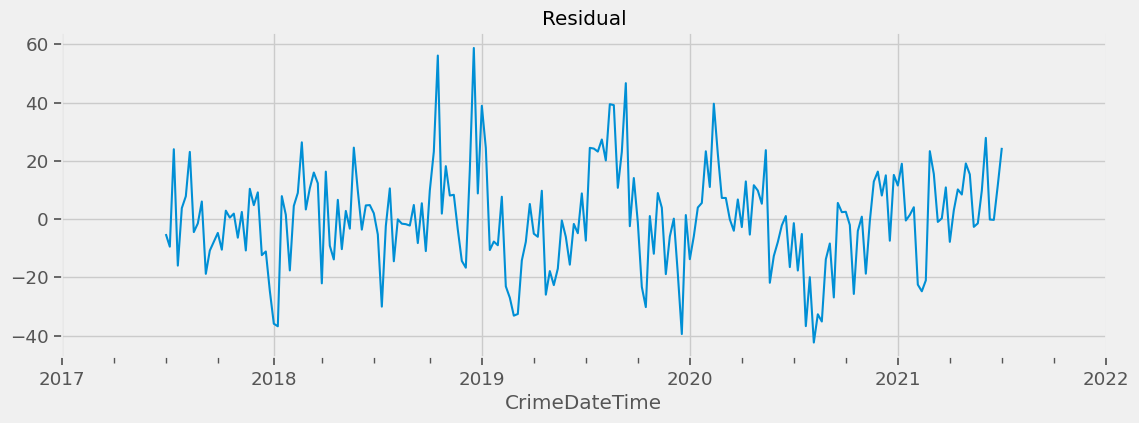

In [81]:
decomp.resid.plot(title='Residual');

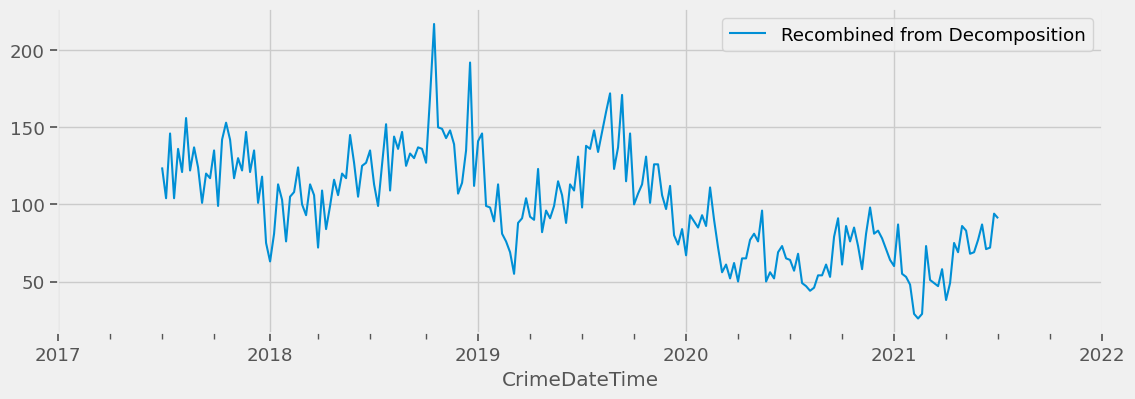

In [82]:
# Adding decomposition components together
ts_model = decomp.trend + decomp.seasonal + decomp.resid
# Visualize the result
ax = ts_model.plot(label='Recombined from Decomposition')
ax.legend();

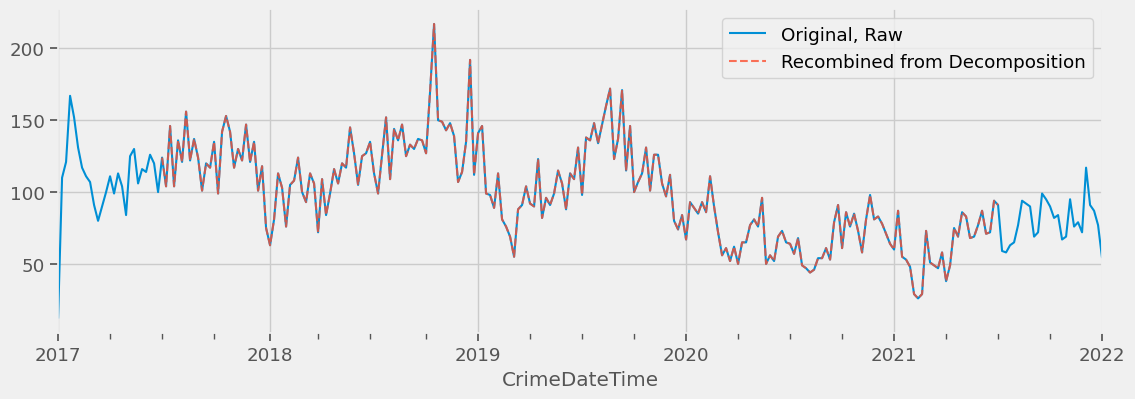

In [83]:
ax = ts.plot(label='Original, Raw')
ts_model.plot(label='Recombined from Decomposition',ax=ax, ls='--', alpha=0.8)
ax.legend();

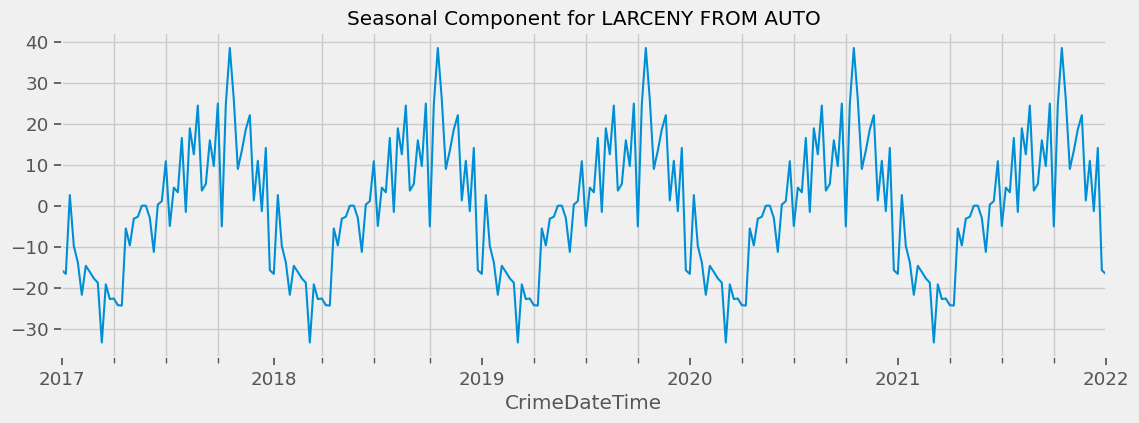

In [84]:
seasonal = decomp.seasonal
ax = seasonal.plot(title=f'Seasonal Component for {crime_type}');
ax.grid(which='both', axis='x')

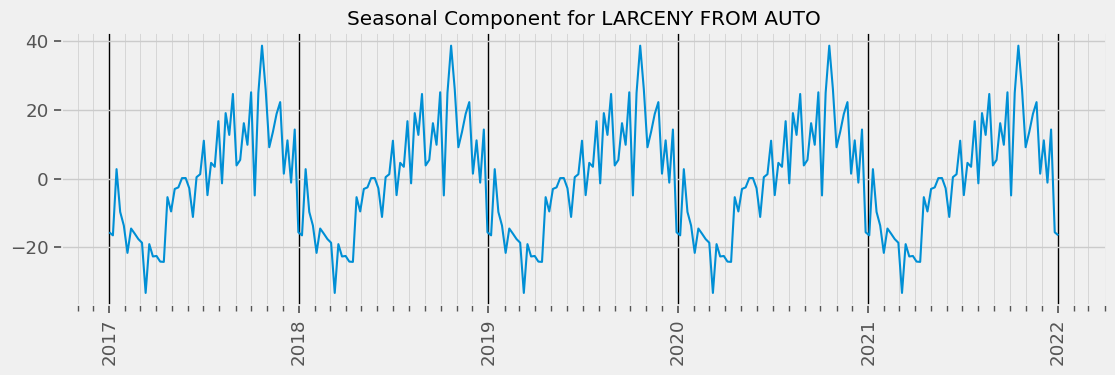

In [85]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for {crime_type}');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

In [86]:
seasonal.max()

38.6142474112426

In [87]:
seasonal.min()

-33.24873335798817

In [88]:
magnitude = seasonal.max() - seasonal.min()
magnitude

71.86298076923077

In [89]:
seasonal.idxmax()

Timestamp('2017-10-22 00:00:00', freq='W-SUN')

In [90]:
seasonal.idxmin()

Timestamp('2017-03-12 00:00:00', freq='W-SUN')

In [91]:
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')
    
    return fig, ax

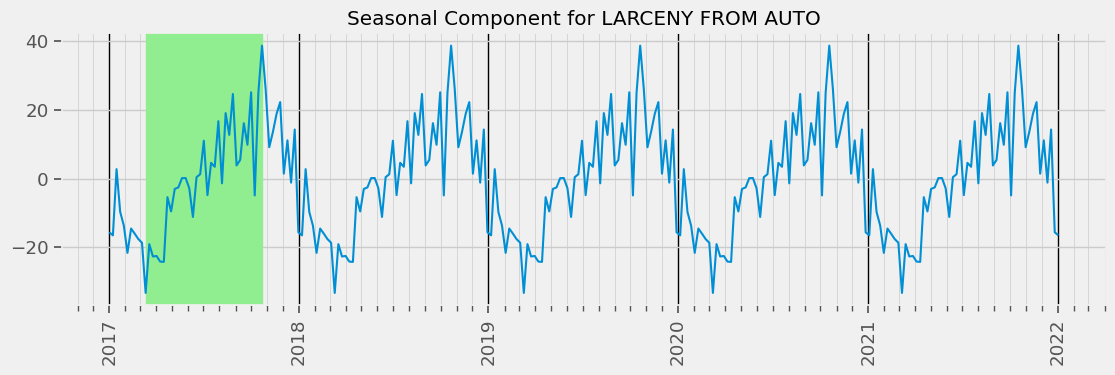

In [92]:
fig, ax = plot_seasonal(seasonal)
ax.axvspan(seasonal.idxmin(),seasonal.idxmax(), color='lightgreen');

In [93]:
delta = seasonal.idxmax() - seasonal.idxmin()
delta

Timedelta('224 days 00:00:00')

In [94]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [95]:
peaks

array([ 42,  94, 146, 198, 250], dtype=int64)

In [96]:
props

{'peak_heights': array([38.61424741, 38.61424741, 38.61424741, 38.61424741, 38.61424741])}

In [97]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2017-10-22', '2018-10-21', '2019-10-20', '2020-10-18',
               '2021-10-17'],
              dtype='datetime64[ns]', name='CrimeDateTime', freq=None)

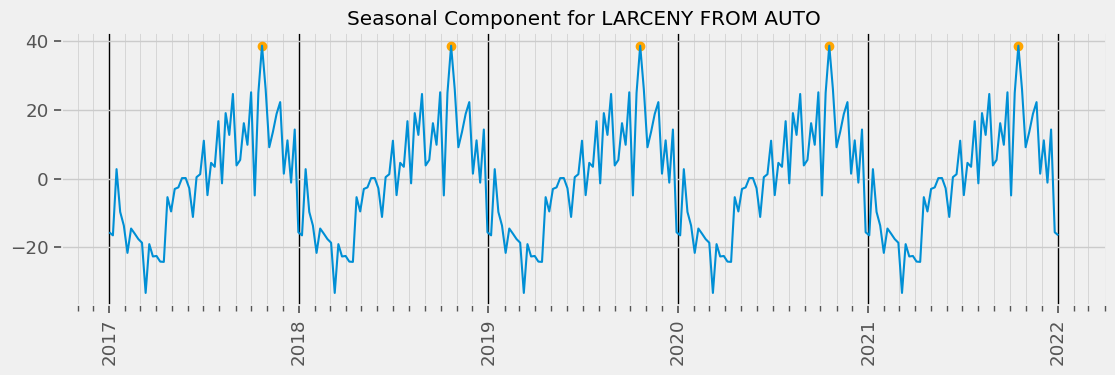

In [98]:
fig,ax = plot_seasonal(seasonal)
ax.scatter(peak_dates, props['peak_heights'], color='orange');

In [99]:
peak_dates

DatetimeIndex(['2017-10-22', '2018-10-21', '2019-10-20', '2020-10-18',
               '2021-10-17'],
              dtype='datetime64[ns]', name='CrimeDateTime', freq=None)

In [100]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('364 days 00:00:00')

In [101]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

[Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00'),
 Timedelta('364 days 00:00:00')]

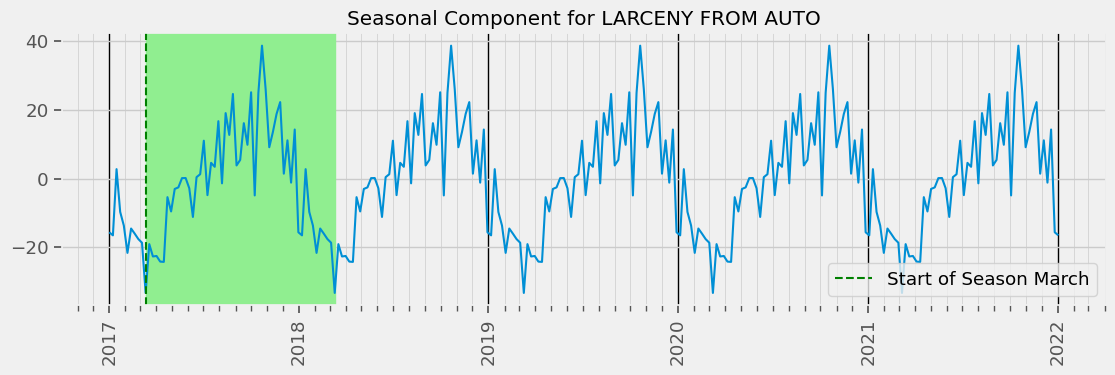

In [102]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

In [103]:
seasonal.max() - seasonal.min()

71.86298076923077

# Stakeholder Questions

1. What is the likelihood of each crime across hours of the day?

In [104]:
## Get # of crimes by Hour
crimes_by_hour = df.groupby('Description')['HourOfDay'].value_counts().sort_index()
crimes_by_hour

Description   HourOfDay
AGG. ASSAULT  0            3605
              1            3389
              2            2724
              3            1855
              4            1324
                           ... 
SHOOTING      19            403
              20            420
              21            486
              22            517
              23            477
Name: HourOfDay, Length: 312, dtype: int64

In [105]:
crimes_by_hour.plot();

In [106]:
## convert to dataframe and reset_index()
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

Description  HourOfDay  # of Crimes
0    AGG. ASSAULT          0         3605
1    AGG. ASSAULT          1         3389
2    AGG. ASSAULT          2         2724
3    AGG. ASSAULT          3         1855
4    AGG. ASSAULT          4         1324
..            ...        ...          ...
307      SHOOTING         19          403
308      SHOOTING         20          420
309      SHOOTING         21          486
310      SHOOTING         22          517
311      SHOOTING         23          477

[312 rows x 3 columns]

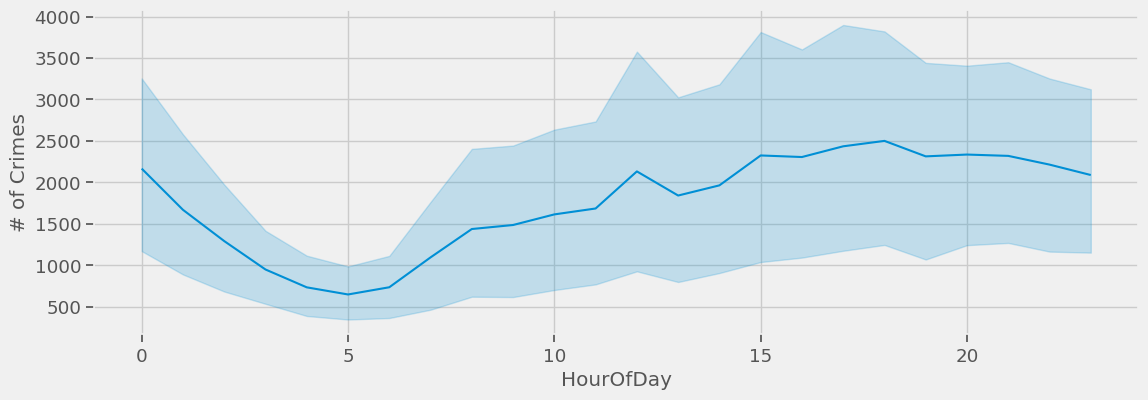

In [107]:
ax = sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes')

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes',markers=True,
                  hue='Description',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

In [109]:
g = sns.catplot(data=plot_df, x='HourOfDay', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Description', col='Description',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [110]:
crime_perc_by_hour = df.groupby('Description')['HourOfDay'].value_counts(normalize=True).sort_index()
crime_perc_by_hour

Description   HourOfDay
AGG. ASSAULT  0            0.057159
              1            0.053734
              2            0.043190
              3            0.029412
              4            0.020993
                             ...   
SHOOTING      19           0.066966
              20           0.069791
              21           0.080758
              22           0.085909
              23           0.079262
Name: HourOfDay, Length: 312, dtype: float64

In [111]:
## Convert to dataframe and reset index
plot_df_perc = crime_perc_by_hour.to_frame('# of Crimes').reset_index()
plot_df_perc

Description  HourOfDay  # of Crimes
0    AGG. ASSAULT          0     0.057159
1    AGG. ASSAULT          1     0.053734
2    AGG. ASSAULT          2     0.043190
3    AGG. ASSAULT          3     0.029412
4    AGG. ASSAULT          4     0.020993
..            ...        ...          ...
307      SHOOTING         19     0.066966
308      SHOOTING         20     0.069791
309      SHOOTING         21     0.080758
310      SHOOTING         22     0.085909
311      SHOOTING         23     0.079262

[312 rows x 3 columns]

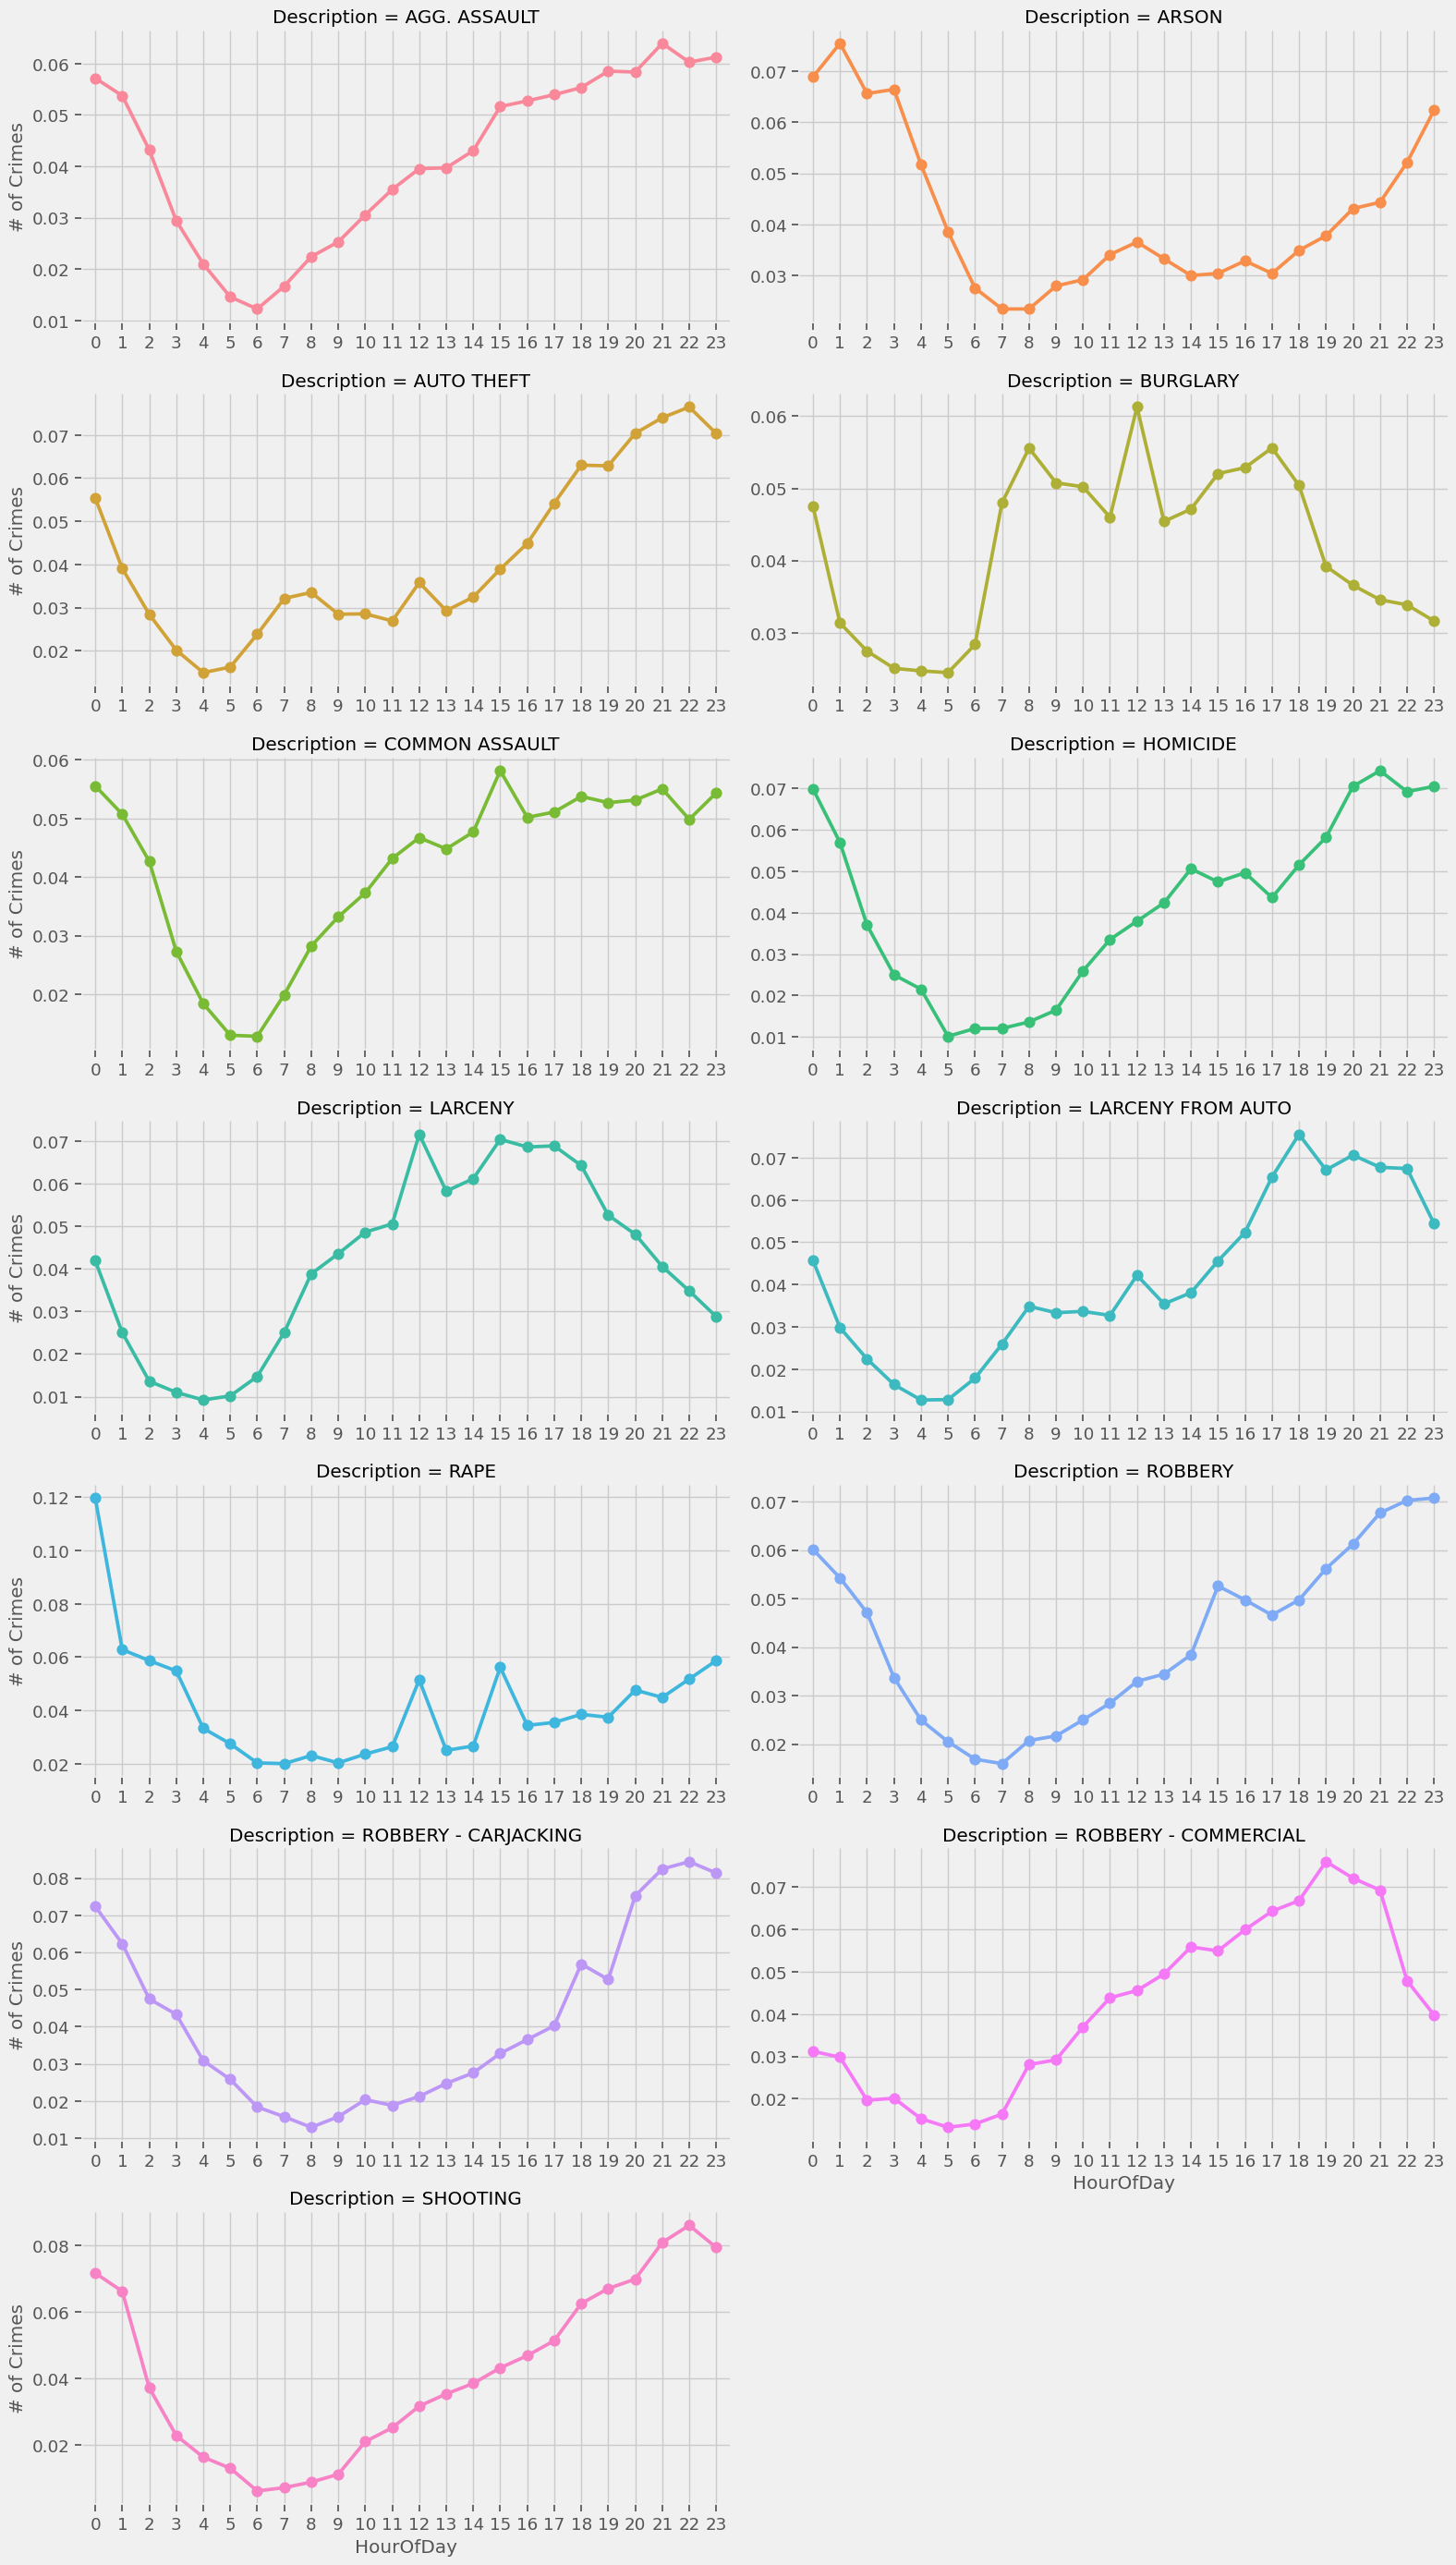

In [113]:
g = sns.catplot(data=plot_df_perc, x='HourOfDay', y='# of Crimes',
                hue='Description', col='Description',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
[ax.grid(axis='x') for ax in g.axes];

In [114]:
# looping through the value counts series
val_counts_by_hour = df.groupby('Description')['HourOfDay'].value_counts()
val_counts_by_hour

Description   HourOfDay
AGG. ASSAULT  21           4032
              23           3863
              22           3801
              19           3691
              20           3680
                           ... 
SHOOTING      5              79
              9              68
              8              54
              7              44
              6              38
Name: HourOfDay, Length: 312, dtype: int64

In [115]:
## Getting all of the crimes from the first level of the index
crime_list = val_counts_by_hour.index.levels[0]
crime_list

Index(['AGG. ASSAULT', 'ARSON', 'AUTO THEFT', 'BURGLARY', 'COMMON ASSAULT',
       'HOMICIDE', 'LARCENY', 'LARCENY FROM AUTO', 'RAPE', 'ROBBERY',
       'ROBBERY - CARJACKING', 'ROBBERY - COMMERCIAL', 'SHOOTING'],
      dtype='object', name='Description')

In [116]:
##selecting a test crime and slicing the result
crime='HOMICIDE'
val_counts_by_hour.loc[crime]

HourOfDay
21    235
20    223
23    223
0     221
22    219
19    184
1     180
18    163
14    160
16    157
15    150
17    138
13    134
12    120
2     117
11    106
10     82
3      79
4      68
9      52
8      43
6      38
7      38
5      32
Name: HourOfDay, dtype: int64

In [117]:
## getting min and max values
val_counts_by_hour.loc[crime].agg(['min','max'])

min     32
max    235
Name: HourOfDay, dtype: int64

In [118]:
##  Getting indices for min and max
val_counts_by_hour.loc[crime].agg(['idxmin','idxmax'])

idxmin     5
idxmax    21
Name: HourOfDay, dtype: int64

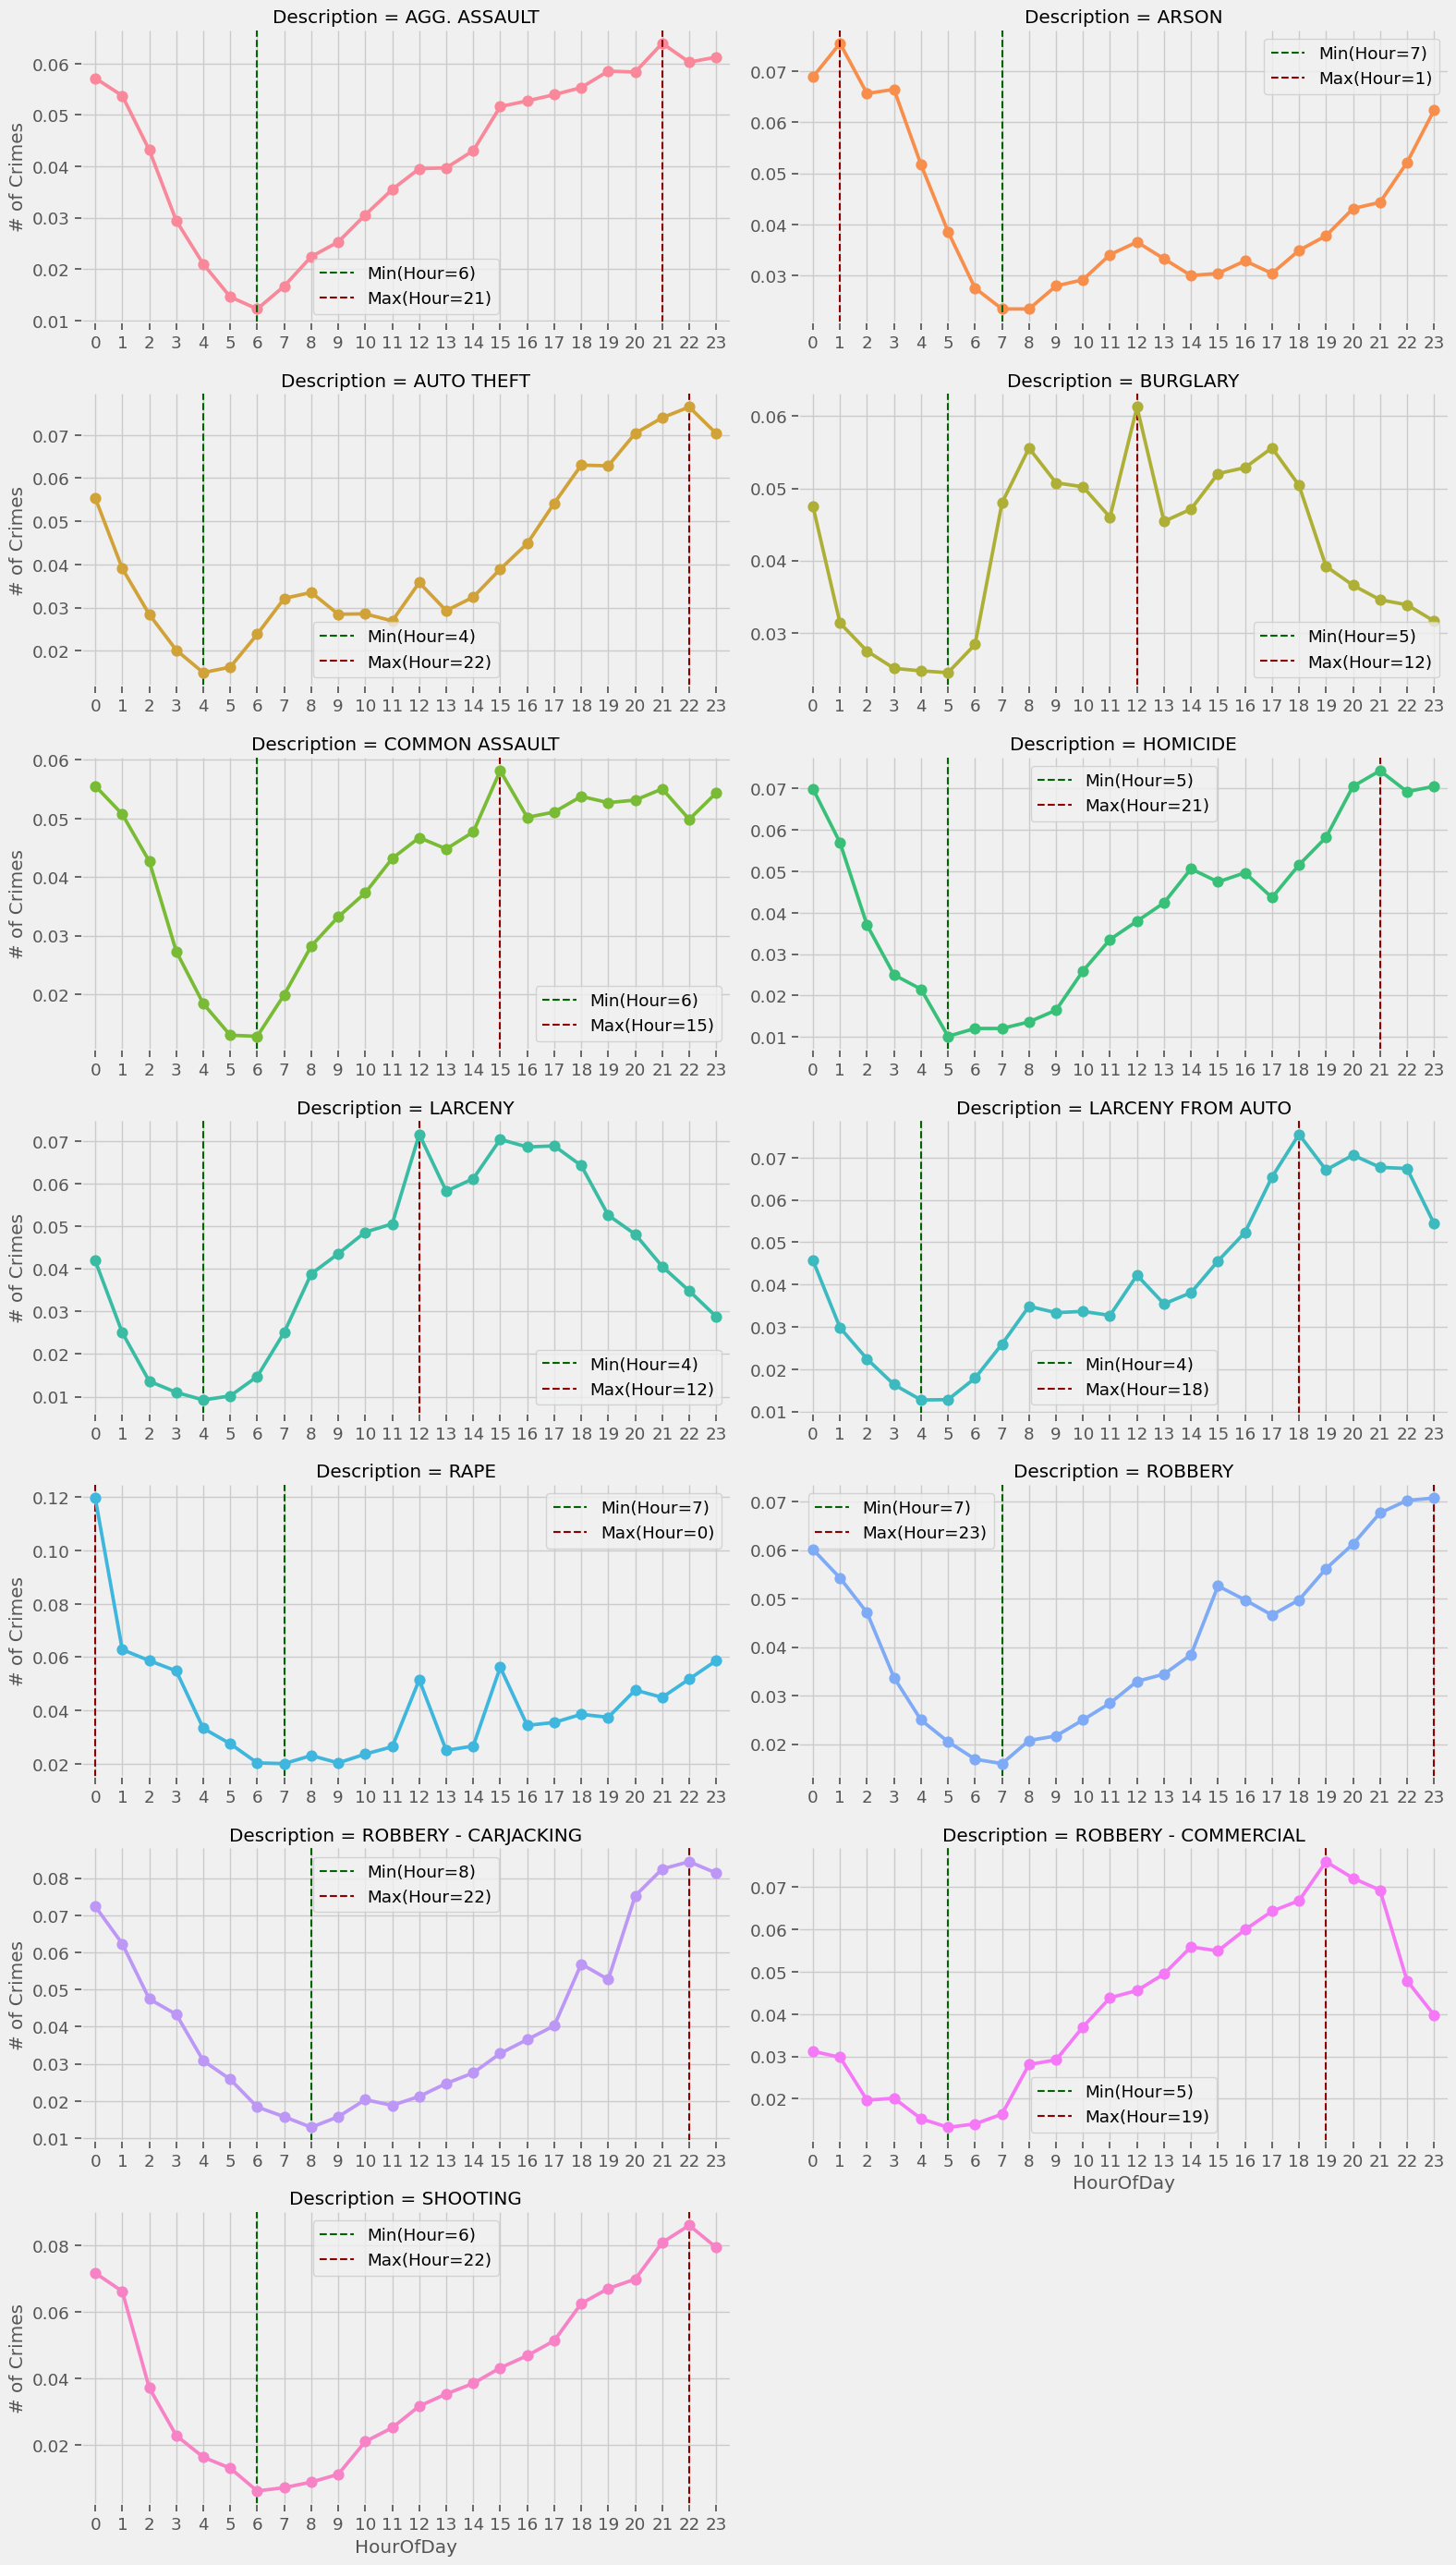

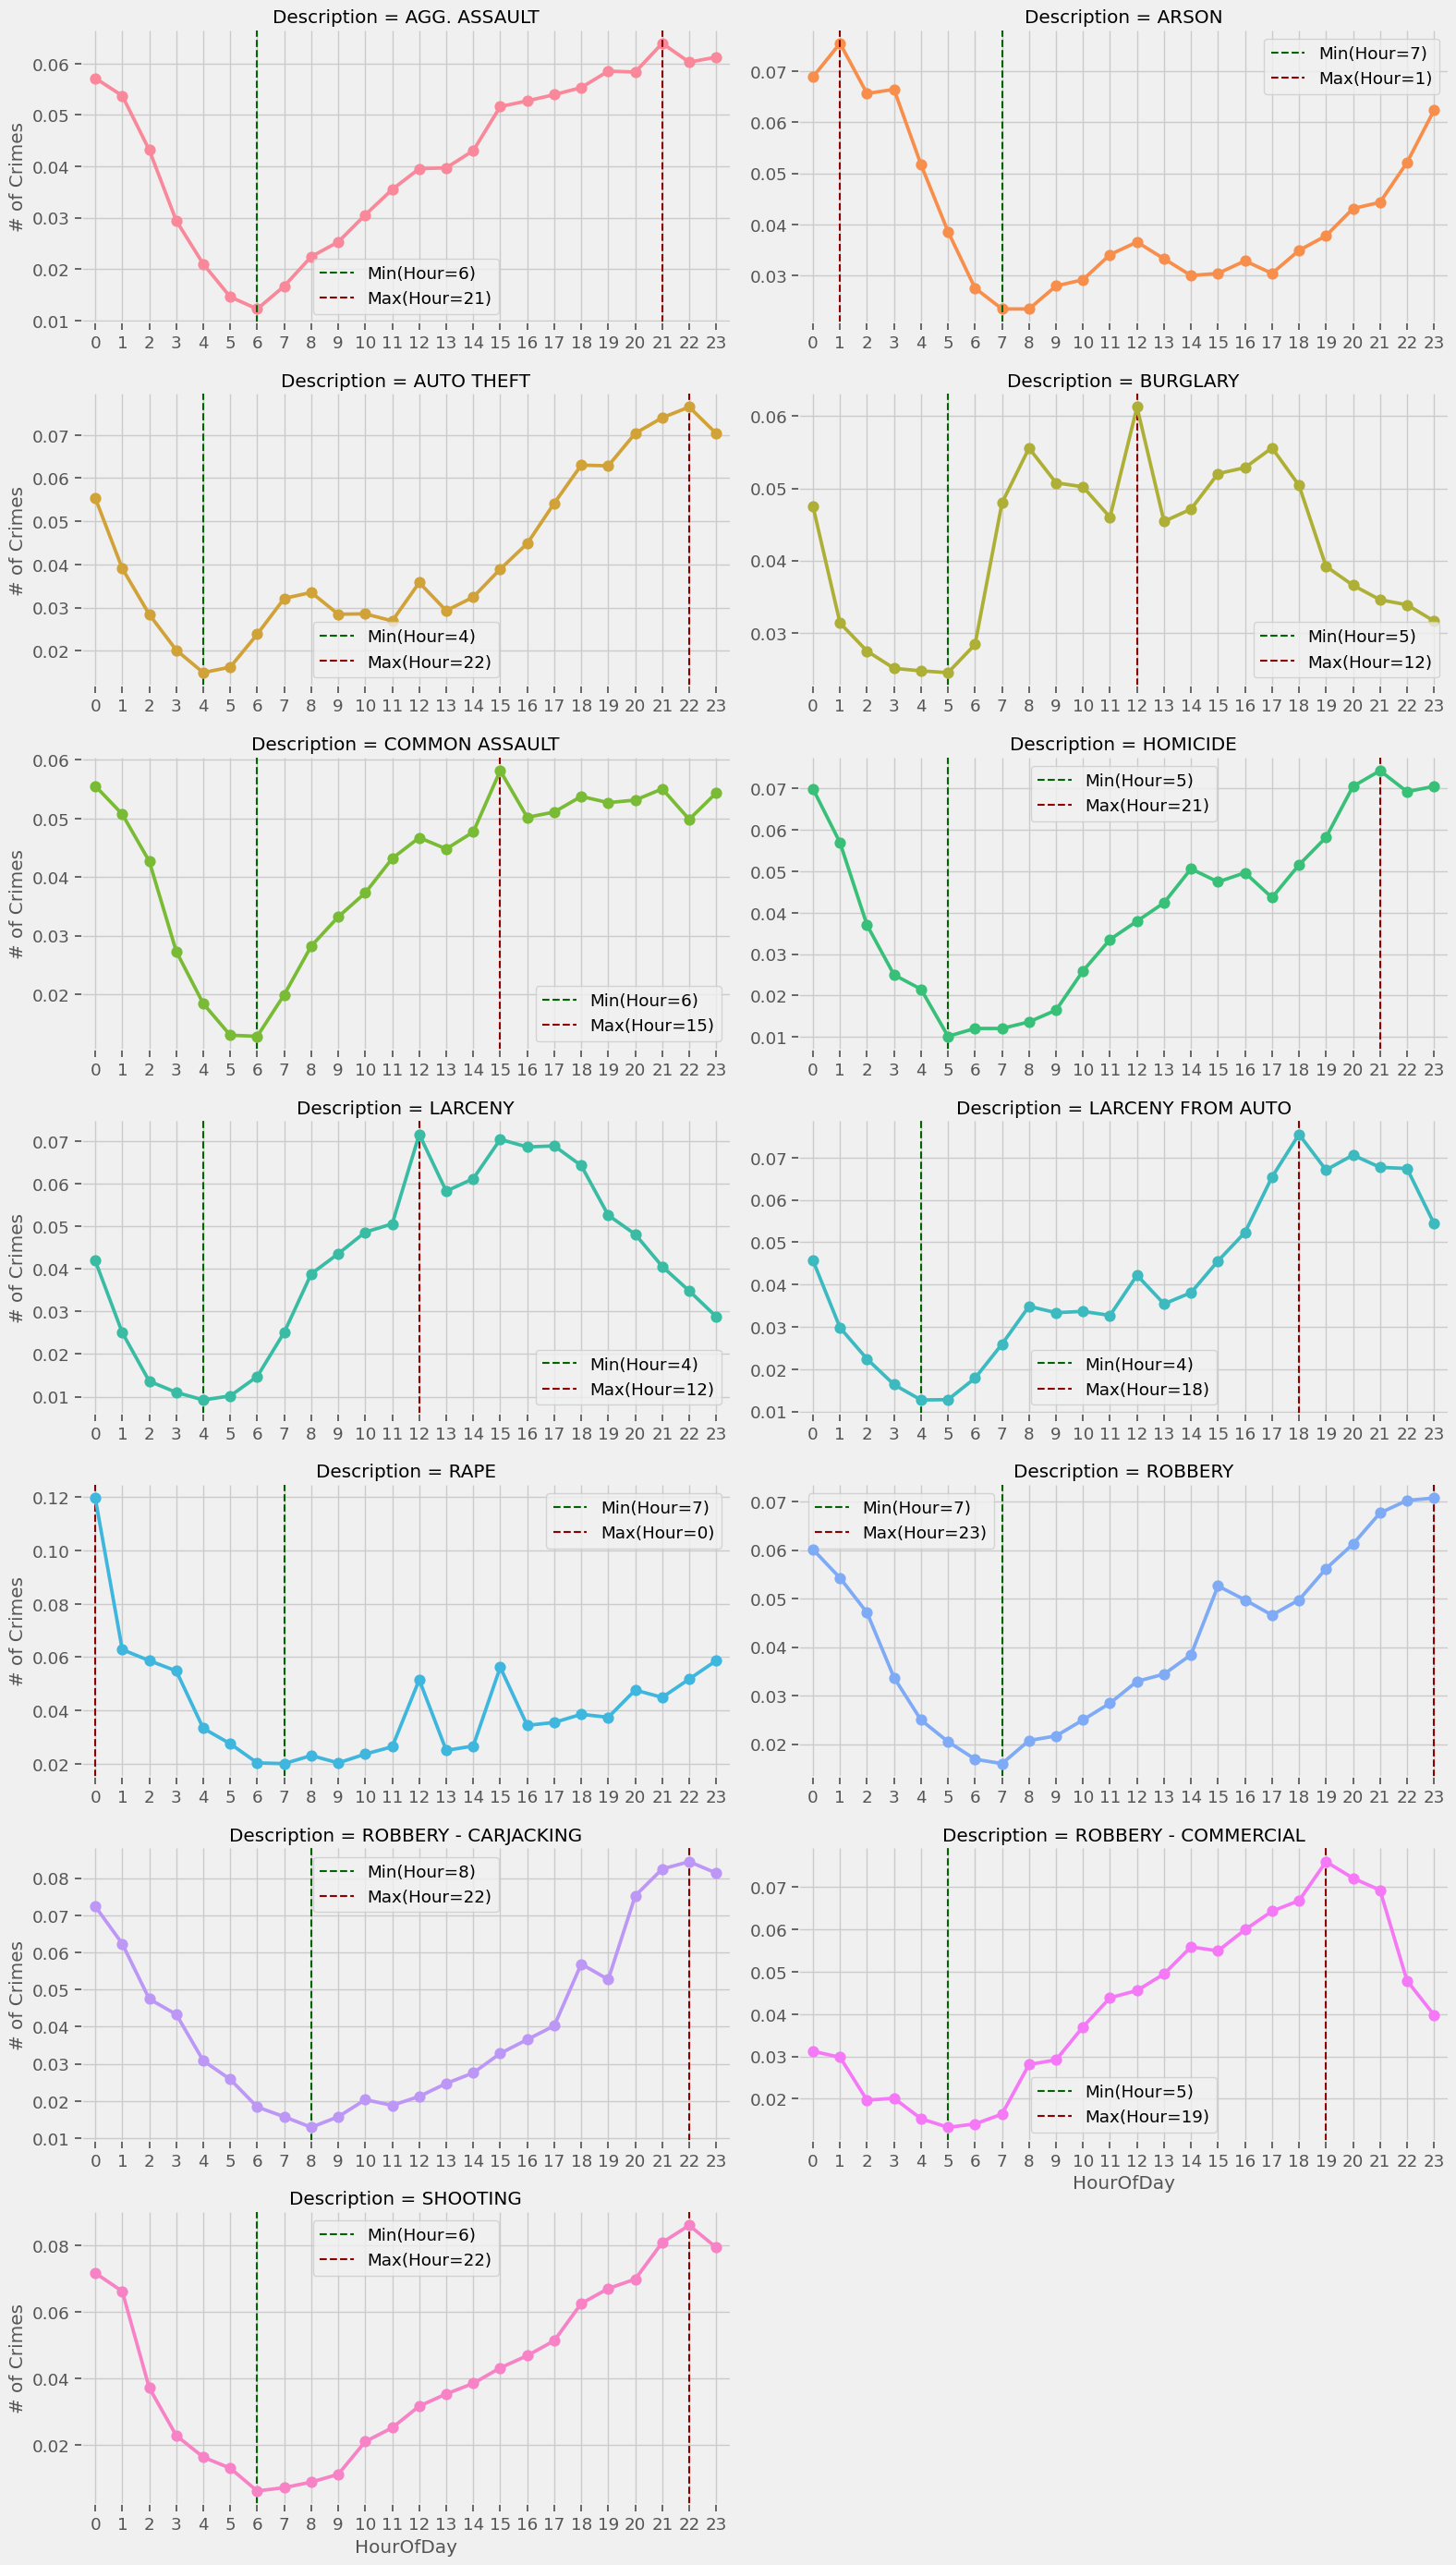

In [119]:
g = sns.catplot(data=plot_df_perc, x='HourOfDay', y='# of Crimes',
                hue='Description', col='Description',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = val_counts_by_hour.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig

2. What are the 3 most common crimes committed in: December-January?

In [121]:
crimes_by_month = df.groupby("Month")['Description'].value_counts(normalize=False)
crimes_by_month

Month  Description         
1      LARCENY                 9144
       COMMON ASSAULT          7352
       BURGLARY                6243
       LARCENY FROM AUTO       5367
       AGG. ASSAULT            4520
                               ... 
12     SHOOTING                 493
       ROBBERY - CARJACKING     426
       RAPE                     258
       HOMICIDE                 256
       ARSON                    168
Name: Description, Length: 156, dtype: int64

In [122]:
jan_dec_crimes = crimes_by_month.loc[1] + crimes_by_month.loc[12]
jan_dec_crimes

Description
AGG. ASSAULT             9189
ARSON                     341
AUTO THEFT               7937
BURGLARY                13060
COMMON ASSAULT          15174
HOMICIDE                  503
LARCENY                 19265
LARCENY FROM AUTO       10957
RAPE                      548
ROBBERY                  7429
ROBBERY - CARJACKING      824
ROBBERY - COMMERCIAL     1286
SHOOTING                  888
Name: Description, dtype: int64

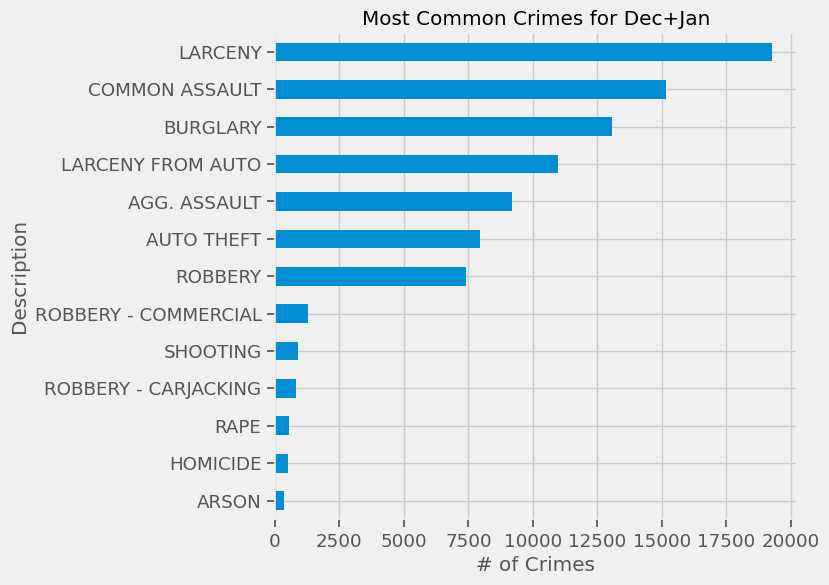

In [123]:
ax = jan_dec_crimes.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for Dec+Jan',xlabel='# of Crimes');

3. Are there crimes that are trending up/down if you calculate the change in crime counts from 2018 to 2021?

In [124]:
## First, resample the data as annual 
df_year  = df.groupby('Description').resample('A').sum()['Total_Incidents'].reset_index()
df_year

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_8548\1448304134.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year  = df.groupby('Description').resample('A').sum()['Total_Incidents'].reset_index()
C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_8548\1448304134.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year  = df.groupby('Description').resample('A').sum()['Total_Incidents'].reset_index()
C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_8548\1448304134.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default

Description CrimeDateTime  Total_Incidents
0    AGG. ASSAULT    2011-12-31             5117
1    AGG. ASSAULT    2012-12-31             4865
2    AGG. ASSAULT    2013-12-31             4602
3    AGG. ASSAULT    2014-12-31             4257
4    AGG. ASSAULT    2015-12-31             4740
..            ...           ...              ...
150      SHOOTING    2018-12-31              677
151      SHOOTING    2019-12-31              766
152      SHOOTING    2020-12-31              721
153      SHOOTING    2021-12-31              726
154      SHOOTING    2022-12-31              689

[155 rows x 3 columns]

In [125]:
## can pivot the result to have the datetime as the index and the crime as the columns
years_ts = df_year.pivot(index='CrimeDateTime',columns='Description')
years_ts.head()

Total_Incidents                                            \
Description      AGG. ASSAULT  ARSON AUTO THEFT BURGLARY COMMON ASSAULT   
CrimeDateTime                                                             
2011-12-31             5117.0  296.0     3767.0   8753.0         9463.0   
2012-12-31             4865.0  243.0     3542.0   7877.0         9258.0   
2013-12-31             4602.0  273.0     3805.0   7462.0         8468.0   
2014-12-31             4257.0  216.0     3652.0   6867.0         7452.0   
2015-12-31             4740.0  292.0     4562.0   7827.0         6984.0   

                                                                  \
Description   HOMICIDE  LARCENY LARCENY FROM AUTO   RAPE ROBBERY   
CrimeDateTime                                                      
2011-12-31         4.0  10037.0            7321.0  316.0  3398.0   
2012-12-31       197.0  10770.0            7039.0  318.0  3520.0   
2013-12-31       210.0  12314.0            6756.0  275.0  3728.0   
2014-12-31       179.0  11336.0            6716.0  247.0  3236.0   
2015-12-31       315.0  10641.0            7046.0  287.0  3759.0   

                                                                  
Description   ROBBERY - CARJACKING ROBBERY - COMMERCIAL SHOOTING  
CrimeDateTime                                                     
2011-12-31                   188.0                307.0      NaN  
2012-12-31                   175.0                291.0     28.0  
2013-12-31                   120.0                250.0     43.0  
2014-12-31                   151.0                518.0    369.0  
2015-12-31                   278.0                682.0    632.0

In [126]:
years_ts.columns

MultiIndex([('Total_Incidents',         'AGG. ASSAULT'),
            ('Total_Incidents',                'ARSON'),
            ('Total_Incidents',           'AUTO THEFT'),
            ('Total_Incidents',             'BURGLARY'),
            ('Total_Incidents',       'COMMON ASSAULT'),
            ('Total_Incidents',             'HOMICIDE'),
            ('Total_Incidents',              'LARCENY'),
            ('Total_Incidents',    'LARCENY FROM AUTO'),
            ('Total_Incidents',                 'RAPE'),
            ('Total_Incidents',              'ROBBERY'),
            ('Total_Incidents', 'ROBBERY - CARJACKING'),
            ('Total_Incidents', 'ROBBERY - COMMERCIAL'),
            ('Total_Incidents',             'SHOOTING')],
           names=[None, 'Description'])

In [127]:
years_ts.columns = years_ts.columns.droplevel(0)
years_ts.columns

Index(['AGG. ASSAULT', 'ARSON', 'AUTO THEFT', 'BURGLARY', 'COMMON ASSAULT',
       'HOMICIDE', 'LARCENY', 'LARCENY FROM AUTO', 'RAPE', 'ROBBERY',
       'ROBBERY - CARJACKING', 'ROBBERY - COMMERCIAL', 'SHOOTING'],
      dtype='object', name='Description')

A) Calculating Change in crimes from 2018 to 2021

In [128]:
## Substract to get delta crmes
delta_crime_yrs = years_ts.loc['2021'] - years_ts.loc['2018']
delta_crime_yrs
# This will null every entry as we're subtracting one df from another

Description    AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
CrimeDateTime                                                              
2018-12-31              NaN    NaN         NaN       NaN             NaN   
2021-12-31              NaN    NaN         NaN       NaN             NaN   

Description    HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY  \
CrimeDateTime                                                        
2018-12-31          NaN      NaN                NaN   NaN      NaN   
2021-12-31          NaN      NaN                NaN   NaN      NaN   

Description    ROBBERY - CARJACKING  ROBBERY - COMMERCIAL  SHOOTING  
CrimeDateTime                                                        
2018-12-31                      NaN                   NaN       NaN  
2021-12-31                      NaN                   NaN       NaN

In [129]:
### if we slice specific dates, we'll return series rather than dataframes, which can then be subtracted
### Substract to get delta crmes
delta_crime_yrs = years_ts.loc['2021-12-31'] - years_ts.loc['2018-12-31']
delta_crime_yrs

Description
AGG. ASSAULT              33.0
ARSON                     -7.0
AUTO THEFT             -1016.0
BURGLARY               -2731.0
COMMON ASSAULT          -287.0
HOMICIDE                  47.0
LARCENY                -3104.0
LARCENY FROM AUTO      -2638.0
RAPE                     -71.0
ROBBERY                -1695.0
ROBBERY - CARJACKING     133.0
ROBBERY - COMMERCIAL     -83.0
SHOOTING                  49.0
dtype: float64

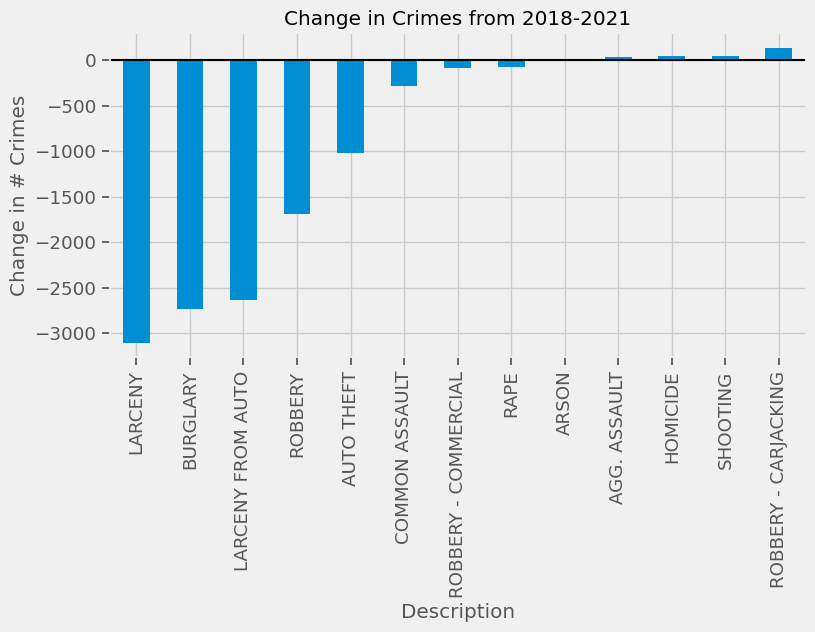

In [130]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2018-2021')
ax.axhline(0,color='k');

B) What if we wanted to see this as a relative change instead of total counts?

In [131]:
## Substract to get delta crmes
delta_crime_perc = (delta_crime_yrs/ years_ts.loc['2018-12-31'])*100
delta_crime_perc.sort_values()

Description
BURGLARY               -43.956221
LARCENY FROM AUTO      -41.367414
ROBBERY                -38.141314
LARCENY                -28.979554
AUTO THEFT             -24.081536
RAPE                   -19.398907
ROBBERY - COMMERCIAL   -12.888199
ARSON                   -5.511811
COMMON ASSAULT          -3.397254
AGG. ASSAULT             0.586250
SHOOTING                 7.237814
HOMICIDE                16.095890
ROBBERY - CARJACKING    31.074766
dtype: float64

In [132]:
from matplotlib import ticker

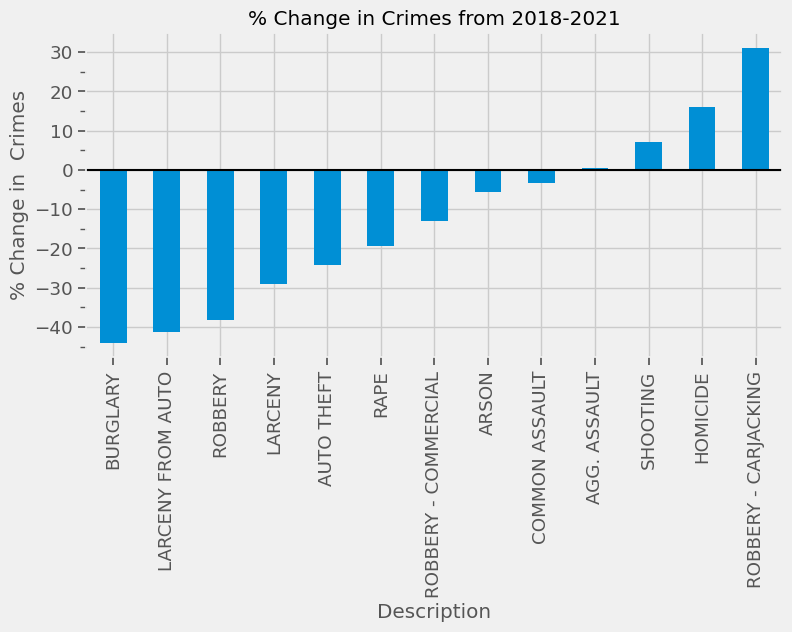

In [133]:
ax = delta_crime_perc.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='% Change in  Crimes',
                                       title='% Change in Crimes from 2018-2021')
ax.axhline(0,color='k');
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

4. What crimes are most common on New Year's Day?

In [138]:
import holidays
import datetime as dt
from holidays import country_holidays

In [140]:
df.head(3)

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                            
2011-01-01           6E     LARCENY              O    NaN      M  44.0   
2011-01-01           2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01           6G     LARCENY              I    NaN      F  26.0   

                                    Race Ethnicity Old_District New_District  \
CrimeDateTime                                                                  
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01                         WHITE       NaN     SOUTHERN          NaN   

               Neighborhood   Latitude  Longitude  Total_Incidents  \
CrimeDateTime                                                        
2011-01-01           MOSHER  39.295633 -76.661518                1   
2011-01-01      HARLEM PARK  39.298964 -76.639291                1   
2011-01-01     FEDERAL HILL  39.276987 -76.613380                1   

                     Date  Year  Month MonthName DayOfWeek  DayNum  Weekend  \
CrimeDateTime                                                                 
2011-01-01     2011-01-01  2011      1   January  Saturday       5     True   
2011-01-01     2011-01-01  2011      1   January  Saturday       5     True   
2011-01-01     2011-01-01  2011      1   January  Saturday       5     True   

               HourOfDay  
CrimeDateTime             
2011-01-01             0  
2011-01-01             0  
2011-01-01             0

In [142]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=4383, freq='D')

In [139]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [143]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2011-01-01 00:00:00


"New Year's Day"

In [144]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [145]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [146]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                                  
2011-01-01 00:00:00        6E     LARCENY              O    NaN      M  44.0   
2011-01-01 00:00:00        2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01 00:00:00        6G     LARCENY              I    NaN      F  26.0   
2011-01-01 00:01:00        6G     LARCENY              I    NaN    NaN   NaN   
2011-01-01 00:01:00        6J     LARCENY              I    NaN      M  24.0   

                                          Race Ethnicity Old_District  \
CrimeDateTime                                                           
2011-01-01 00:00:00  BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN   
2011-01-01 00:00:00  BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN   
2011-01-01 00:00:00                      WHITE       NaN     SOUTHERN   
2011-01-01 00:01:00                    UNKNOWN       NaN    SOUTHEAST   
2011-01-01 00:01:00                      WHITE       NaN     SOUTHERN   

                    New_District  Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                          
2011-01-01 00:00:00          NaN        MOSHER  39.295633 -76.661518   
2011-01-01 00:00:00          NaN   HARLEM PARK  39.298964 -76.639291   
2011-01-01 00:00:00          NaN  FEDERAL HILL  39.276987 -76.613380   
2011-01-01 00:01:00          NaN     GREEKTOWN  39.285083 -76.552772   
2011-01-01 00:01:00          NaN  FEDERAL HILL  39.274854 -76.612777   

                     Total_Incidents        Date  Year  Month MonthName  \
CrimeDateTime                                                             
2011-01-01 00:00:00                1  2011-01-01  2011      1   January   
2011-01-01 00:00:00                1  2011-01-01  2011      1   January   
2011-01-01 00:00:00                1  2011-01-01  2011      1   January   
2011-01-01 00:01:00                1  2011-01-01  2011      1   January   
2011-01-01 00:01:00                1  2011-01-01  2011      1   January   

                    DayOfWeek  DayNum  Weekend  HourOfDay      US Holiday  \
CrimeDateTime                                                               
2011-01-01 00:00:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:00:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:00:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:01:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:01:00  Saturday       5     True          0  New Year's Day   

                         MD Holiday  
CrimeDateTime                        
2011-01-01 00:00:00  New Year's Day  
2011-01-01 00:00:00  New Year's Day  
2011-01-01 00:00:00  New Year's Day  
2011-01-01 00:01:00  New Year's Day  
2011-01-01 00:01:00  New Year's Day

In [147]:
## Saving a binary is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()

False    532884
True      16722
Name: Is_Holiday, dtype: int64

In [148]:
holiday_crimes = df.groupby('US Holiday')['Description'].value_counts()
holiday_crimes = holiday_crimes.to_frame('# of Crimes')
holiday_crimes

# of Crimes
US Holiday            Description                      
Christmas Day         COMMON ASSAULT                297
                      BURGLARY                      242
                      LARCENY                       186
                      LARCENY FROM AUTO             131
                      AGG. ASSAULT                  130
...                                                 ...
Washington's Birthday SHOOTING                       13
                      RAPE                           11
                      ARSON                           6
                      ROBBERY - CARJACKING            6
                      HOMICIDE                        4

[204 rows x 1 columns]

In [149]:
## checking the values of the index (outer index is level 0)
holiday_crimes.index.levels[0]

Index(['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day',
       'Independence Day', 'Independence Day (Observed)',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (Observed)', 'Labor Day',
       'Martin Luther King Jr. Day', 'Memorial Day', 'New Year's Day',
       'New Year's Day (Observed)', 'Thanksgiving', 'Veterans Day',
       'Veterans Day (Observed)', 'Washington's Birthday'],
      dtype='object', name='US Holiday')

In [150]:
holiday_crimes.loc["New Year's Day"]

# of Crimes
Description                      
COMMON ASSAULT                379
LARCENY                       371
AGG. ASSAULT                  261
BURGLARY                      219
LARCENY FROM AUTO             183
AUTO THEFT                    126
ROBBERY                       112
RAPE                           64
SHOOTING                       20
ROBBERY - COMMERCIAL           17
ARSON                          11
HOMICIDE                       11
ROBBERY - CARJACKING            7

In [151]:
holiday_crimes.loc["New Year's Day (Observed)"]

# of Crimes
Description                      
LARCENY                        76
COMMON ASSAULT                 67
BURGLARY                       61
LARCENY FROM AUTO              55
ROBBERY                        39
AUTO THEFT                     37
AGG. ASSAULT                   33
ROBBERY - COMMERCIAL           11
ROBBERY - CARJACKING            5
SHOOTING                        4
HOMICIDE                        1
RAPE                            1

In [152]:
## let's try simply adding them
holiday_crimes.loc["New Year's Day"] + holiday_crimes.loc["New Year's Day (Observed)"]

# of Crimes
Description                      
AGG. ASSAULT                294.0
ARSON                         NaN
AUTO THEFT                  163.0
BURGLARY                    280.0
COMMON ASSAULT              446.0
HOMICIDE                     12.0
LARCENY                     447.0
LARCENY FROM AUTO           238.0
RAPE                         65.0
ROBBERY                     151.0
ROBBERY - CARJACKING         12.0
ROBBERY - COMMERCIAL         28.0
SHOOTING                     24.0

In [153]:
temp = pd.concat([holiday_crimes.loc["New Year's Day"],
                  holiday_crimes.loc["New Year's Day (Observed)"]],
                 axis=1)
temp

# of Crimes  # of Crimes
Description                                   
COMMON ASSAULT                379         67.0
LARCENY                       371         76.0
AGG. ASSAULT                  261         33.0
BURGLARY                      219         61.0
LARCENY FROM AUTO             183         55.0
AUTO THEFT                    126         37.0
ROBBERY                       112         39.0
RAPE                           64          1.0
SHOOTING                       20          4.0
ROBBERY - COMMERCIAL           17         11.0
ARSON                          11          NaN
HOMICIDE                       11          1.0
ROBBERY - CARJACKING            7          5.0

In [154]:
## get the .sum ACROSS columns (use axis=1)
new_years_sum = temp.sum(axis=1)
new_years_sum

Description
COMMON ASSAULT          446.0
LARCENY                 447.0
AGG. ASSAULT            294.0
BURGLARY                280.0
LARCENY FROM AUTO       238.0
AUTO THEFT              163.0
ROBBERY                 151.0
RAPE                     65.0
SHOOTING                 24.0
ROBBERY - COMMERCIAL     28.0
ARSON                    11.0
HOMICIDE                 12.0
ROBBERY - CARJACKING     12.0
dtype: float64

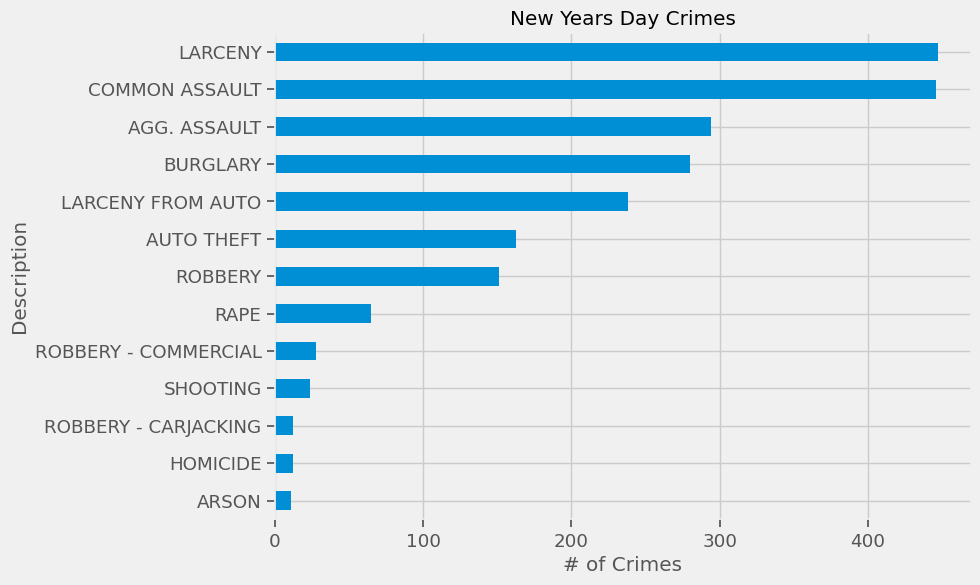

In [155]:
ax = new_years_sum.sort_values().plot(kind='barh',figsize=(8,6))
ax.set(title="New Years Day Crimes", xlabel='# of Crimes');

5. Are there more crimes on Thanksgiving than on any other Thursday in the dataset?

In [156]:
daily_df = df.groupby('Description').resample('D').sum()['Total_Incidents'].reset_index()
daily_df = daily_df.pivot(index='CrimeDateTime',columns='Description')
daily_df.columns = daily_df.columns.droplevel(0)
daily_df = daily_df.fillna(0)
daily_df.head()

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_8548\3702711125.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_df = df.groupby('Description').resample('D').sum()['Total_Incidents'].reset_index()


Description    AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
CrimeDateTime                                                              
2011-01-01             28.0    1.0        15.0      21.0            41.0   
2011-01-02              6.0    0.0         5.0      19.0            14.0   
2011-01-03             13.0    0.0         7.0      21.0            15.0   
2011-01-04             11.0    0.0        10.0      12.0            29.0   
2011-01-05              9.0    0.0        10.0      28.0            26.0   

Description    HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY  \
CrimeDateTime                                                        
2011-01-01          0.0     39.0               27.0   5.0      5.0   
2011-01-02          0.0     20.0               20.0   2.0     10.0   
2011-01-03          0.0     19.0               16.0   1.0      9.0   
2011-01-04          0.0     29.0               12.0   1.0      4.0   
2011-01-05          0.0     30.0               14.0   0.0      6.0   

Description    ROBBERY - CARJACKING  ROBBERY - COMMERCIAL  SHOOTING  
CrimeDateTime                                                        
2011-01-01                      0.0                   2.0       0.0  
2011-01-02                      0.0                   1.0       0.0  
2011-01-03                      0.0                   1.0       0.0  
2011-01-04                      0.0                   0.0       0.0  
2011-01-05                      0.0                   2.0       0.0

In [157]:
## Let's calculate a total crime column
daily_df['TOTAL CRIME'] = daily_df.sum(axis=1) 
daily_df.head()

Description    AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
CrimeDateTime                                                              
2011-01-01             28.0    1.0        15.0      21.0            41.0   
2011-01-02              6.0    0.0         5.0      19.0            14.0   
2011-01-03             13.0    0.0         7.0      21.0            15.0   
2011-01-04             11.0    0.0        10.0      12.0            29.0   
2011-01-05              9.0    0.0        10.0      28.0            26.0   

Description    HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY  \
CrimeDateTime                                                        
2011-01-01          0.0     39.0               27.0   5.0      5.0   
2011-01-02          0.0     20.0               20.0   2.0     10.0   
2011-01-03          0.0     19.0               16.0   1.0      9.0   
2011-01-04          0.0     29.0               12.0   1.0      4.0   
2011-01-05          0.0     30.0               14.0   0.0      6.0   

Description    ROBBERY - CARJACKING  ROBBERY - COMMERCIAL  SHOOTING  \
CrimeDateTime                                                         
2011-01-01                      0.0                   2.0       0.0   
2011-01-02                      0.0                   1.0       0.0   
2011-01-03                      0.0                   1.0       0.0   
2011-01-04                      0.0                   0.0       0.0   
2011-01-05                      0.0                   2.0       0.0   

Description    TOTAL CRIME  
CrimeDateTime               
2011-01-01           184.0  
2011-01-02            97.0  
2011-01-03           102.0  
2011-01-04           108.0  
2011-01-05           125.0

In [158]:
## adding day of week and holiday features to daily_df
daily_df['DayOfWeek'] = daily_df.index.day_name()
daily_df['Holiday']  = daily_df.index.map(us_holidays.get)
daily_df["Holiday"] = daily_df["Holiday"].fillna("None")
daily_df.head()

Description    AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
CrimeDateTime                                                              
2011-01-01             28.0    1.0        15.0      21.0            41.0   
2011-01-02              6.0    0.0         5.0      19.0            14.0   
2011-01-03             13.0    0.0         7.0      21.0            15.0   
2011-01-04             11.0    0.0        10.0      12.0            29.0   
2011-01-05              9.0    0.0        10.0      28.0            26.0   

Description    HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY  \
CrimeDateTime                                                        
2011-01-01          0.0     39.0               27.0   5.0      5.0   
2011-01-02          0.0     20.0               20.0   2.0     10.0   
2011-01-03          0.0     19.0               16.0   1.0      9.0   
2011-01-04          0.0     29.0               12.0   1.0      4.0   
2011-01-05          0.0     30.0               14.0   0.0      6.0   

Description    ROBBERY - CARJACKING  ROBBERY - COMMERCIAL  SHOOTING  \
CrimeDateTime                                                         
2011-01-01                      0.0                   2.0       0.0   
2011-01-02                      0.0                   1.0       0.0   
2011-01-03                      0.0                   1.0       0.0   
2011-01-04                      0.0                   0.0       0.0   
2011-01-05                      0.0                   2.0       0.0   

Description    TOTAL CRIME  DayOfWeek         Holiday  
CrimeDateTime                                          
2011-01-01           184.0   Saturday  New Year's Day  
2011-01-02            97.0     Sunday            None  
2011-01-03           102.0     Monday            None  
2011-01-04           108.0    Tuesday            None  
2011-01-05           125.0  Wednesday            None

In [159]:
## Making filters for group conditions
is_thanks = daily_df['Holiday'].str.contains('thanksgiving',case=False)
daily_df.loc[is_thanks]

Description    AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
CrimeDateTime                                                              
2011-11-24             15.0    0.0         2.0      25.0            20.0   
2012-11-22              8.0    0.0         5.0      11.0            18.0   
2013-11-28              7.0    0.0        12.0      15.0            24.0   
2014-11-27              8.0    1.0         1.0      16.0            10.0   
2015-11-26             14.0    0.0         9.0      14.0            16.0   
2016-11-24             16.0    0.0         8.0      15.0            22.0   
2017-11-23             11.0    0.0         7.0      20.0            20.0   
2018-11-22             19.0    0.0        15.0      11.0            29.0   
2019-11-28             13.0    0.0         5.0      11.0            17.0   
2020-11-26             11.0    0.0         5.0       8.0            17.0   
2021-11-25             25.0    1.0        10.0      11.0            38.0   
2022-11-24             19.0    0.0        12.0       9.0            33.0   

Description    HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY  \
CrimeDateTime                                                        
2011-11-24          0.0     20.0               29.0   4.0      6.0   
2012-11-22          1.0     14.0               14.0   1.0      4.0   
2013-11-28          0.0     26.0                9.0   1.0      7.0   
2014-11-27          0.0     20.0               15.0   0.0     12.0   
2015-11-26          0.0     14.0               21.0   0.0      9.0   
2016-11-24          0.0     19.0               15.0   1.0     13.0   
2017-11-23          0.0     14.0               13.0   0.0      5.0   
2018-11-22          0.0     16.0               20.0   0.0      4.0   
2019-11-28          1.0     19.0                7.0   1.0     12.0   
2020-11-26          0.0     13.0               19.0   2.0      6.0   
2021-11-25          0.0     12.0                7.0   1.0      3.0   
2022-11-24          1.0     19.0               13.0   0.0      5.0   

Description    ROBBERY - CARJACKING  ROBBERY - COMMERCIAL  SHOOTING  \
CrimeDateTime                                                         
2011-11-24                      1.0                   0.0       0.0   
2012-11-22                      0.0                   0.0       0.0   
2013-11-28                      0.0                   1.0       0.0   
2014-11-27                      1.0                   2.0       1.0   
2015-11-26                      1.0                   0.0       1.0   
2016-11-24                      1.0                   1.0       0.0   
2017-11-23                      2.0                   4.0       1.0   
2018-11-22                      0.0                   2.0       1.0   
2019-11-28                      0.0                   1.0       1.0   
2020-11-26                      3.0                   0.0       0.0   
2021-11-25                      1.0                   0.0       3.0   
2022-11-24                      1.0                   1.0       0.0   

Description    TOTAL CRIME DayOfWeek       Holiday  
CrimeDateTime                                       
2011-11-24           122.0  Thursday  Thanksgiving  
2012-11-22            76.0  Thursday  Thanksgiving  
2013-11-28           102.0  Thursday  Thanksgiving  
2014-11-27            87.0  Thursday  Thanksgiving  
2015-11-26            99.0  Thursday  Thanksgiving  
2016-11-24           111.0  Thursday  Thanksgiving  
2017-11-23            97.0  Thursday  Thanksgiving  
2018-11-22           117.0  Thursday  Thanksgiving  
2019-11-28            88.0  Thursday  Thanksgiving  
2020-11-26            84.0  Thursday  Thanksgiving  
2021-11-25           112.0  Thursday  Thanksgiving  
2022-11-24           113.0  Thursday  Thanksgiving

In [160]:
is_thurs = daily_df['DayOfWeek']=='Thursday'
daily_df.loc[is_thurs & ~is_thanks]

Description    AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
CrimeDateTime                                                              
2011-01-06              9.0    1.0         3.0      17.0            18.0   
2011-01-13              8.0    1.0        14.0      23.0            21.0   
2011-01-20             18.0    1.0        12.0      29.0            21.0   
2011-01-27             12.0    1.0         6.0      12.0             2.0   
2011-02-03              4.0    1.0         3.0      24.0            15.0   
...                     ...    ...         ...       ...             ...   
2022-12-01             18.0    0.0        11.0      10.0            24.0   
2022-12-08             11.0    0.0        13.0      20.0            27.0   
2022-12-15             13.0    0.0        11.0      10.0            14.0   
2022-12-22             18.0    0.0         7.0      14.0            26.0   
2022-12-29             16.0    1.0        12.0      15.0            21.0   

Description    HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY  \
CrimeDateTime                                                        
2011-01-06          0.0     24.0               24.0   1.0      5.0   
2011-01-13          0.0     20.0               16.0   0.0      9.0   
2011-01-20          0.0     26.0               10.0   0.0     15.0   
2011-01-27          0.0     13.0               14.0   0.0      6.0   
2011-02-03          0.0     29.0               10.0   0.0      8.0   
...                 ...      ...                ...   ...      ...   
2022-12-01          2.0     40.0               14.0   2.0      6.0   
2022-12-08          2.0     30.0               12.0   0.0     10.0   
2022-12-15          0.0     34.0                4.0   1.0      5.0   
2022-12-22          0.0     26.0                4.0   0.0      4.0   
2022-12-29          3.0     26.0                6.0   2.0      4.0   

Description    ROBBERY - CARJACKING  ROBBERY - COMMERCIAL  SHOOTING  \
CrimeDateTime                                                         
2011-01-06                      0.0                   2.0       0.0   
2011-01-13                      0.0                   0.0       0.0   
2011-01-20                      1.0                   2.0       0.0   
2011-01-27                      0.0                   2.0       0.0   
2011-02-03                      1.0                   0.0       0.0   
...                             ...                   ...       ...   
2022-12-01                      4.0                   0.0       2.0   
2022-12-08                      1.0                   2.0       1.0   
2022-12-15                      3.0                   1.0       0.0   
2022-12-22                      1.0                   0.0       2.0   
2022-12-29                      2.0                   4.0       3.0   

Description    TOTAL CRIME DayOfWeek Holiday  
CrimeDateTime                                 
2011-01-06           104.0  Thursday    None  
2011-01-13           112.0  Thursday    None  
2011-01-20           135.0  Thursday    None  
2011-01-27            68.0  Thursday    None  
2011-02-03            95.0  Thursday    None  
...                    ...       ...     ...  
2022-12-01           133.0  Thursday    None  
2022-12-08           129.0  Thursday    None  
2022-12-15            96.0  Thursday    None  
2022-12-22           102.0  Thursday    None  
2022-12-29           115.0  Thursday    None  

[614 rows x 16 columns]

In [161]:
## copying our dataframe for the vis
plot_df = daily_df.copy()
## using our filters and .loc to fill in a new "Group" col
plot_df.loc[is_thanks, 'Group'] = 'Thanksgiving'
plot_df.loc[~is_thanks & is_thurs, 'Group'] = 'Other Thursday'
plot_df['Group'].value_counts(dropna=False)

NaN               3757
Other Thursday     614
Thanksgiving        12
Name: Group, dtype: int64

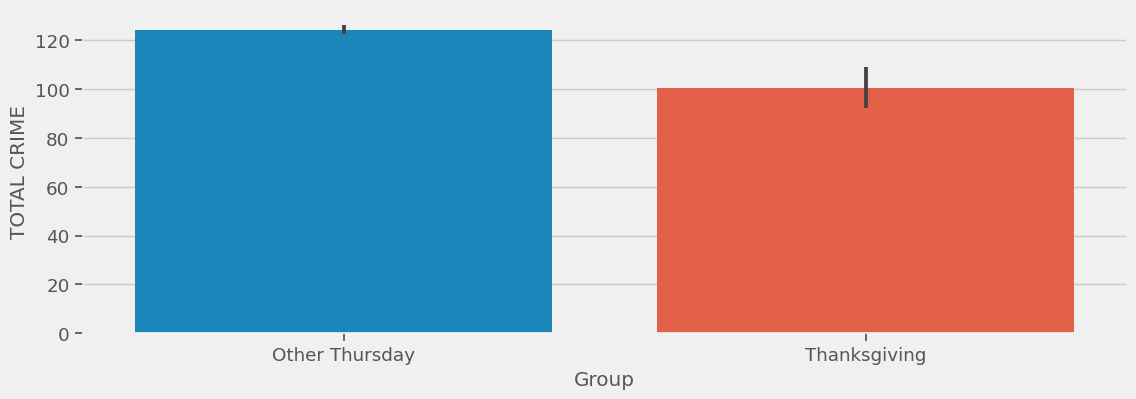

In [162]:
ax = sns.barplot(data=plot_df, x='Group', y='TOTAL CRIME');